### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from datetime import datetime as dt

from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.dummy import DummyRegressor

### Load in Training / Testing Data

In [2]:
df_train = pd.read_csv('Data/train.csv')
df_test = pd.read_csv('Data/test.csv')
pd.set_option('display.max_columns', None)

### Data Overview


In [3]:
#df_train['Train'] = 1
#df_test['Train'] = 0
#combined = pd.concat([df_train,df_test])

In [4]:
df_train.shape

(1460, 81)

In [5]:

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df_train.describe

<bound method NDFrame.describe of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour 

In [7]:

df_test.shape

# Same shape as training data minus the tbd Sale Price column

(1459, 80)

## Data Cleaning

### Cleaning Functions

In [8]:
# Find Columns with missing data

def find_na(df)-> list:
    '''
    Iterates over data frame columns
    Return  list of tuples containing (Column Name, Sum NA)
    '''

    missing_list = []

    for column in df.columns:
        if df[column].isna().sum() > 0:
            na_count = df[column].isna().sum()
            missing_list.append((column, na_count))
    
    return missing_list



In [9]:
def count_na(df,column)->int:
    '''
    Return the # of na values in specified column
    '''
    na_count = df[column].isna().sum()

    return na_count
    

In [10]:
def fill_na(df,column,value):
    '''
    Fill in the missing data with a specified value
    '''

    df[column].fillna(value = value, inplace = True)

In [11]:
def change_dtype(df, column, ndt):
    ''' 
    Change a column to a new data type (ndt)
    '''

    df[column] = df[column].map(ndt)


### Addressing Null/Missing Data

In [12]:
find_na(df_train)

[('LotFrontage', 259),
 ('Alley', 1369),
 ('MasVnrType', 872),
 ('MasVnrArea', 8),
 ('BsmtQual', 37),
 ('BsmtCond', 37),
 ('BsmtExposure', 38),
 ('BsmtFinType1', 37),
 ('BsmtFinType2', 38),
 ('Electrical', 1),
 ('FireplaceQu', 690),
 ('GarageType', 81),
 ('GarageYrBlt', 81),
 ('GarageFinish', 81),
 ('GarageQual', 81),
 ('GarageCond', 81),
 ('PoolQC', 1453),
 ('Fence', 1179),
 ('MiscFeature', 1406)]

In [13]:
find_na(df_test)

[('MSZoning', 4),
 ('LotFrontage', 227),
 ('Alley', 1352),
 ('Utilities', 2),
 ('Exterior1st', 1),
 ('Exterior2nd', 1),
 ('MasVnrType', 894),
 ('MasVnrArea', 15),
 ('BsmtQual', 44),
 ('BsmtCond', 45),
 ('BsmtExposure', 44),
 ('BsmtFinType1', 42),
 ('BsmtFinSF1', 1),
 ('BsmtFinType2', 42),
 ('BsmtFinSF2', 1),
 ('BsmtUnfSF', 1),
 ('TotalBsmtSF', 1),
 ('BsmtFullBath', 2),
 ('BsmtHalfBath', 2),
 ('KitchenQual', 1),
 ('Functional', 2),
 ('FireplaceQu', 730),
 ('GarageType', 76),
 ('GarageYrBlt', 78),
 ('GarageFinish', 78),
 ('GarageCars', 1),
 ('GarageArea', 1),
 ('GarageQual', 78),
 ('GarageCond', 78),
 ('PoolQC', 1456),
 ('Fence', 1169),
 ('MiscFeature', 1408),
 ('SaleType', 1)]

In [14]:
df_train[df_train['LotFrontage'].isna()]['MSZoning'].value_counts()

MSZoning
RL    229
RM     19
FV      8
RH      3
Name: count, dtype: int64

##### Lot Frontage

In [15]:
# Replace missing Lot Frontage data with mean

# Train
fill_na(df_train, 'LotFrontage', df_train['LotFrontage'].mean())

# Test
fill_na(df_test, 'LotFrontage', df_test['LotFrontage'].mean())


#### Alley

In [16]:
count_na(df_train,'Alley')

1369

In [17]:
df_train['Alley'].value_counts()
#df_test['Alley'].value_counts()

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

In [18]:
# The Kaggle data dict shows 3 values for Alley (Grvl:Gravel, Pave:Paved, and NA:No Access). So the missing values in Train/Test will be replaced with NA

fill_na(df_train, 'Alley', 'NA')
fill_na(df_test, 'Alley', 'NA')


#### Masonry Veneer Type (MasVnrType)

In [19]:
df_train['MasVnrType'].value_counts()

MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [20]:
# Categorical Data with important data in other columns so rows cannot be dropped. Missing values will be replaced with 'None'
fill_na(df_train, 'MasVnrType', 'None')
fill_na(df_test, 'MasVnrType', 'None')

#### Masonry Veneer Area (MasVnrArea)

In [21]:
count_na(df_train, 'MasVnrArea')

8

In [22]:
df_train[df_train['MasVnrType']=='None'][['MasVnrArea']].value_counts()

MasVnrArea
0.0           859
1.0             2
288.0           1
312.0           1
344.0           1
Name: count, dtype: int64

In [23]:
# For the vast majoirty of houses where MV Type = None the MV Areas = 0, the missing MV Areas values will be replaced with 0 in both the Train/Test data sets
fill_na(df_train, 'MasVnrArea', 0)
fill_na(df_test, 'MasVnrArea', 0)

#### Basemement Quality (BsmtQual)

In [24]:
count_na(df_train, 'BsmtQual')

37

In [25]:
df_train['BsmtQual'].value_counts()

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64

In [26]:
#df_train[df_train['BsmtQual'].isna()]['BsmtExposure']
#df_train[df_train['BsmtQual'].isna()]['BsmtCond']
#df_train[df_train['BsmtQual'].isna()]['BsmtFinSF1']
df_train[df_train['BsmtQual'].isna()]['BldgType']

17      Duplex
39      Duplex
90        1Fam
102     Duplex
156       1Fam
182       1Fam
259       1Fam
342     Duplex
362       1Fam
371       1Fam
392       1Fam
520     2fmCon
532       1Fam
533       1Fam
553       1Fam
646       1Fam
705     2fmCon
736     Duplex
749       1Fam
778     Duplex
868       1Fam
894     Duplex
897     Duplex
984     Duplex
1000      1Fam
1011    Duplex
1035      1Fam
1045      1Fam
1048      1Fam
1049      1Fam
1090    Duplex
1179      1Fam
1216    Duplex
1218      1Fam
1232    Duplex
1321      1Fam
1412    Duplex
Name: BldgType, dtype: object

In [27]:
# The Kaggle data dict shows 6 potential values for Basement Quality (Ex:Excellent (100+ inches), Gd:Good (90-99 inches), TA:Typical (80-89 inches), Fa:Fair (70-79 inches), Po:Poor (<70 inches), NA:No Basement)
# Because the rows with missing BsmtQual data are missing other basement data and seem to genrally line up with homes/locations that often don't have basements, the missing data will be replaced with NA

fill_na(df_train, 'BsmtQual', 'NA')
fill_na(df_test, 'BsmtQual', 'NA')

#### Basemement Condition (BsmtCond)

In [28]:
count_na(df_train, 'BsmtCond')

37

In [29]:
df_train['BsmtCond'].value_counts()

BsmtCond
TA    1311
Gd      65
Fa      45
Po       2
Name: count, dtype: int64

In [30]:
# The Kaggle data dict shows a Basement Condition of NA for no basements. Missing values will be replaced with NA
fill_na(df_train, 'BsmtCond', 'NA')
fill_na(df_test, 'BsmtCond', 'NA')

#### Basemement Exposure (BsmtExposure)

In [31]:
count_na(df_train, 'BsmtExposure')

38

In [32]:
df_train['BsmtExposure'].value_counts()

BsmtExposure
No    953
Av    221
Gd    134
Mn    114
Name: count, dtype: int64

In [33]:
df_train[df_train['BsmtQual'] == 'NA']['BsmtExposure']

17      NaN
39      NaN
90      NaN
102     NaN
156     NaN
182     NaN
259     NaN
342     NaN
362     NaN
371     NaN
392     NaN
520     NaN
532     NaN
533     NaN
553     NaN
646     NaN
705     NaN
736     NaN
749     NaN
778     NaN
868     NaN
894     NaN
897     NaN
984     NaN
1000    NaN
1011    NaN
1035    NaN
1045    NaN
1048    NaN
1049    NaN
1090    NaN
1179    NaN
1216    NaN
1218    NaN
1232    NaN
1321    NaN
1412    NaN
Name: BsmtExposure, dtype: object

In [34]:
fill_na(df_train, 'BsmtExposure', 'NA')
fill_na(df_test, 'BsmtExposure', 'NA')

#### Rating of Basement Finished Area (BsmtFinType1)

In [35]:
count_na(df_train,'BsmtFinType1')

37

In [36]:
df_train['BsmtFinType1'].value_counts()

BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: count, dtype: int64

In [37]:
fill_na(df_train, 'BsmtFinType1', 'NA')
fill_na(df_test, 'BsmtFinType1', 'NA')

#### Rating of Basement Finished Area 2 - If multiple types (BsmtFinType2)

In [38]:
count_na(df_train,'BsmtFinType2')

38

In [39]:
df_train['BsmtFinType2'].value_counts()

BsmtFinType2
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64

In [40]:
fill_na(df_train, 'BsmtFinType2', 'NA')
fill_na(df_test, 'BsmtFinType2', 'NA')

#### Electrical: Electrical system

In [41]:
count_na(df_train,'Electrical')

1

In [42]:
count_na(df_test,'Electrical')

0

In [43]:
df_train['Electrical'].value_counts()

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

In [44]:
df_train[df_train['Electrical'].isna()]['YearBuilt'].value_counts()

YearBuilt
2006    1
Name: count, dtype: int64

In [45]:
# Only 1 home had a missing Electrical Value. Because most houses have SBrkr and this house was built in 2006, the missing value will be replaced with SBrkr
fill_na(df_train, 'Electrical', 'SBrkr')

#### Fireplace Quality (FireplaceQu)

In [46]:
count_na(df_train,'FireplaceQu')

690

In [47]:
df_train['FireplaceQu'].value_counts()

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

In [48]:
df_train[df_train['FireplaceQu'].isna()]['Fireplaces'].value_counts()

Fireplaces
0    690
Name: count, dtype: int64

In [49]:
# The Kaggle data dict shows a value of NA:No Fireplace. The missing values will be replaced with NA
fill_na(df_train, 'FireplaceQu', 'NA')
fill_na(df_test, 'FireplaceQu', 'NA')

#### GarageType: Garage location

In [50]:
count_na(df_train,'GarageType')

81

In [51]:
df_train['GarageType'].value_counts()

GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

In [52]:
df_train[df_train['GarageType'].isna()]['GarageArea'].value_counts()

GarageArea
0    81
Name: count, dtype: int64

In [53]:
df_test[df_test['GarageType'].isna()]['GarageArea'].value_counts()

GarageArea
0.0    76
Name: count, dtype: int64

In [54]:
# The data dictionary shows NA:No Garage so the missing values will be replaced with NA
fill_na(df_train, 'GarageType', 'NA')
fill_na(df_test, 'GarageType', 'NA')

#### GarageYrBlt: Year garage was built

In [55]:
count_na(df_train,'GarageYrBlt')

81

In [56]:
df_train[df_train['GarageYrBlt'].isna()]['GarageArea'].value_counts()

GarageArea
0    81
Name: count, dtype: int64

In [57]:
count_na(df_test,'GarageYrBlt')

78

In [58]:
df_test[df_test['GarageYrBlt'].isna()]['GarageType'].value_counts()

GarageType
NA        76
Detchd     2
Name: count, dtype: int64

In [59]:
df_test.query('GarageYrBlt.isna() and GarageType == "Detchd"')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
666,2127,60,RM,57.0,8094,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2.5Unf,6,8,1910,1983,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,TA,TA,Mn,Rec,196.0,Unf,0.0,1046.0,1242.0,GasA,Gd,Y,SBrkr,1242,742,0,1984,0.0,0.0,2,0,5,1,TA,8,Typ,0,NA,Detchd,NaN,NaN,1.0,360.0,NaN,NaN,Y,64,0,180,0,0,0,NaN,MnPrv,Shed,1000,9,2008,WD,Normal
1116,2577,70,RM,50.0,9060,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NA,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca


In [60]:
fill_na(df_train, 'GarageYrBlt', 'NA')

# 2 rows in the test data set contain houses with detatched garages but are missing most/all other garage info. These values will be set to NA
fill_na(df_test, 'GarageYrBlt', 'NA')

/tmp/ipykernel_354157/2485835239.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'NA' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df[column].fillna(value = value, inplace = True)


In [61]:
count_na(df_train,'GarageFinish')

81

In [62]:
df_train['GarageFinish'].value_counts()

GarageFinish
Unf    605
RFn    422
Fin    352
Name: count, dtype: int64

In [63]:
df_train[df_train['GarageFinish'].isna()]['GarageType'].value_counts()

GarageType
NA    81
Name: count, dtype: int64

In [64]:

# The data dict shows NA:No Garage for Garage Finish. Missing values will be replaced with NA
fill_na(df_train, 'GarageFinish', 'NA')
fill_na(df_test, 'GarageFinish', 'NA')

#### GarageQual: Garage quality

In [65]:
count_na(df_train,'GarageQual')

81

In [66]:
df_train['GarageQual'].value_counts()

GarageQual
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64

In [67]:
# The data dict shows NA:No Garage as an option for Garage Quality. Missing values will be replaced with NA
fill_na(df_train, 'GarageQual', 'NA')
fill_na(df_test, 'GarageQual', 'NA')

#### GarageCond: Garage condition

In [68]:
count_na(df_train,'GarageCond')

81

In [69]:
df_train['GarageCond'].value_counts()

GarageCond
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: count, dtype: int64

In [70]:
# The data dict shows NA:No Garage as an option for Garage Condition. Missing values will be replaced with NA
fill_na(df_train, 'GarageCond', 'NA')
fill_na(df_test, 'GarageCond', 'NA')

#### PoolQC: Pool quality

In [71]:
count_na(df_train,'PoolQC')


1453

In [72]:
total_houses_train = df_train['Id'].count()
with_pools_train = df_train[df_train['PoolArea'] != 0].shape[0]

total_houses_test = df_test['Id'].count()
with_pools_test = df_test[df_test['PoolArea'] != 0].shape[0]

print(f"{round((with_pools_train/total_houses_train)*100, 2)}% of houses in the training set have pools")
print(f"{round((with_pools_test/total_houses_test)*100, 2)}% of houses in the training set have pools")

0.48% of houses in the training set have pools
0.41% of houses in the training set have pools


In [73]:
# Since the vast majority of houses in both data sets have no pools, the missing values will be set to NA for No Pool (according to the data dict)
fill_na(df_train, 'PoolQC', 'NA')
fill_na(df_test, 'PoolQC', 'NA')

#### Fence: Fence quality

In [74]:
count_na(df_train,'Fence')

1179

In [75]:
df_train['Fence'].value_counts()

Fence
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: count, dtype: int64

In [76]:
# The data dict shows NA:No Fence as an option for Fence. Missing values will be replaced with NA
fill_na(df_train, 'Fence', 'NA')
fill_na(df_test, 'Fence', 'NA')

#### MiscFeature: Miscellaneous feature not covered in other categories

In [77]:
count_na(df_train,'MiscFeature')

1406

In [78]:
df_train['MiscFeature'].value_counts()

MiscFeature
Shed    49
Gar2     2
Othr     2
TenC     1
Name: count, dtype: int64

In [79]:
# The data dict shows NA:No Misc. Feature as an option for Misc Feature. Missing values will be replaced with NA
fill_na(df_train, 'MiscFeature', 'NA')
fill_na(df_test, 'MiscFeature', 'NA')

In [80]:
find_na(df_test)

[('MSZoning', 4),
 ('Utilities', 2),
 ('Exterior1st', 1),
 ('Exterior2nd', 1),
 ('BsmtFinSF1', 1),
 ('BsmtFinSF2', 1),
 ('BsmtUnfSF', 1),
 ('TotalBsmtSF', 1),
 ('BsmtFullBath', 2),
 ('BsmtHalfBath', 2),
 ('KitchenQual', 1),
 ('Functional', 2),
 ('GarageCars', 1),
 ('GarageArea', 1),
 ('SaleType', 1)]

In [81]:
find_na(df_train)

# All null values in the training set have been addressed

[]

#### Create Age at Sale Column


In [82]:
# (Year Sold - Year Remodled = House Age @ Sale) 
df_train['Age_at_Sale'] = df_train['YrSold'] - df_train['YearRemodAdd']

### Data Types

In [83]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [84]:
types = df_train.columns.to_series().groupby(df_train.dtypes).groups
types

{int64: ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'Age_at_Sale'], float64: ['LotFrontage', 'MasVnrArea'], object: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'Garage

#### Int to String

In [85]:
#df_train[['Id', 'MSSubClass']] = df_train[['Id', 'MSSubClass']].astype(str)
to_str = ['Id', 'MSSubClass']
for col in to_str:
    change_dtype(df_train,col,str)


In [86]:
month_dict = {1: 'January',
         2: 'February',
         3: 'March',
         4: 'April',
         5: 'May',
         6: 'June',
         7: 'July',
         8: 'August',
         9: 'September',
         10: 'October',
         11: 'November',
         12: 'December'}

change_dtype(df_train, 'MoSold', month_dict)

### Check for Extremes

In [87]:
df_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice,Age_at_Sale
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,2007.815753,180921.195890,22.950000
std,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,1.328095,79442.502883,20.640653
min,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,34900.000000,-1.000000
25%,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,129975.000000,4.000000
50%,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,163000.000000,14.000000
75%,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,214000.000000,41.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,2010.000000,755000.000000,60.000000


In [88]:
df_train.select_dtypes(exclude='object').min()


LotFrontage         21.0
LotArea           1300.0
OverallQual          1.0
OverallCond          1.0
YearBuilt         1872.0
YearRemodAdd      1950.0
MasVnrArea           0.0
BsmtFinSF1           0.0
BsmtFinSF2           0.0
BsmtUnfSF            0.0
TotalBsmtSF          0.0
1stFlrSF           334.0
2ndFlrSF             0.0
LowQualFinSF         0.0
GrLivArea          334.0
BsmtFullBath         0.0
BsmtHalfBath         0.0
FullBath             0.0
HalfBath             0.0
BedroomAbvGr         0.0
KitchenAbvGr         0.0
TotRmsAbvGrd         2.0
Fireplaces           0.0
GarageCars           0.0
GarageArea           0.0
WoodDeckSF           0.0
OpenPorchSF          0.0
EnclosedPorch        0.0
3SsnPorch            0.0
ScreenPorch          0.0
PoolArea             0.0
MiscVal              0.0
YrSold            2006.0
SalePrice        34900.0
Age_at_Sale         -1.0
dtype: float64

In [89]:
df_train[df_train['SalePrice'] == df_train.loc[:,'SalePrice'].min()]
# Small,old home with abnormal sale (Data Dict: trade, foreclosure, short sale) so seems correct

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Age_at_Sale
495,496,30,C (all),60.0,7879,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,4,5,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,495,Unf,0,225,720,GasA,TA,N,FuseA,720,0,0,720,0,0,1,0,2,1,TA,4,Typ,0,NA,NA,NA,NA,0,0,NA,NA,N,0,523,115,0,0,0,NA,GdWo,NA,0,November,2009,WD,Abnorml,34900,59


In [90]:
df_train.select_dtypes(exclude='object').max()

LotFrontage         313.0
LotArea          215245.0
OverallQual          10.0
OverallCond           9.0
YearBuilt          2010.0
YearRemodAdd       2010.0
MasVnrArea         1600.0
BsmtFinSF1         5644.0
BsmtFinSF2         1474.0
BsmtUnfSF          2336.0
TotalBsmtSF        6110.0
1stFlrSF           4692.0
2ndFlrSF           2065.0
LowQualFinSF        572.0
GrLivArea          5642.0
BsmtFullBath          3.0
BsmtHalfBath          2.0
FullBath              3.0
HalfBath              2.0
BedroomAbvGr          8.0
KitchenAbvGr          3.0
TotRmsAbvGrd         14.0
Fireplaces            3.0
GarageCars            4.0
GarageArea         1418.0
WoodDeckSF          857.0
OpenPorchSF         547.0
EnclosedPorch       552.0
3SsnPorch           508.0
ScreenPorch         480.0
PoolArea            738.0
MiscVal           15500.0
YrSold             2010.0
SalePrice        755000.0
Age_at_Sale          60.0
dtype: float64

### Categorical Data

In [91]:
df_train.select_dtypes(exclude='number').columns

Index(['Id', 'MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

#### Change Ordinal to Numerical



In [92]:
# All of these columns have some ordinal ranking for their values
ordinal_cols = [
    'ExterQual',
    'ExterCond',
    'BsmtQual',
    'BsmtCond',
    'BsmtExposure',
    'BsmtFinType1',
    'BsmtFinType2',
    'HeatingQC',
    'Electrical',
    'KitchenQual',
    'Functional',
    'FireplaceQu',
    'GarageFinish',
    'GarageQual',
    'GarageCond', 
    'PoolQC'
]

In [93]:
# These are most of the ordinal rankings that appear in our dataset. higher is better.
ordinal_dict = {
    "Typ"  : 7.0,
    "Min1" : 6.0,
    "GLQ"  : 6.0,
    "Min2" : 5.0,
    "ALQ"  : 5.0,
    "Ex"   : 5.0,
    "Mod"  : 4.0,
    "BLQ"  : 4.0,
    "Gd"   : 4.0,
    "SBrkr": 4.0, 
    "Maj1" : 3.0,
    "Rec"  : 3.0,
    "Av"   : 3.0,
    "TA"   : 3.0,
    "Fin"  : 3.0,
    "FuseA": 3.0,
    "Maj2" : 2.0,
    "LwQ"  : 2.0,
    "Mn"   : 2.0,
    "Fa"   : 2.0,
    "FuseF": 2.0,
    "RFn"  : 2.0,
    "Sev"  : 1.0,
    "Unf"  : 1.0,
    "No"   : 1.0,
    "Po"   : 1.0,
    "FuseP": 1.0,
    "Mix"  : 0.0,
    "Sal"  : 0.0,
    "NA"   : 0.0
}

In [94]:
# Map the dictionary to the ordinal columns in both the training and testing data sets
df_train[ordinal_cols] = df_train[ordinal_cols].apply(lambda col: col.map(ordinal_dict))
df_test[ordinal_cols] = df_test[ordinal_cols].apply(lambda col: col.map(ordinal_dict))

### Rename Values and Columns (For Readability)

##### Values

In [95]:
# The dictionary for the type of house, "MS SubClass"

'''
house_class_names = {
    20 : '1-Story (1946 & Newer, All Styles)',
    30 : '1-Story (1945 & Older)',
    40 : '1-Story With Finished Attic (All Ages)',
    45 : '1-1/2 Story - Unfinished (All Ages)',
    50 : '1-1/2 Story - Finished (All Ages)',
    60 : '2-Story (1946 & Newer)',
    70 : '2-Story  (1946 & Older)',
    75 : '2-1/2 Story (All Ages)',
    80 : 'Split or Multi-Level',
    85 : 'Split Foyer',
    90 : 'Duplex (All Styles & Ages)',
    120: '1-Story Planned Unit Development (1946 & Newer)',
    150: '1-1/2 Story Planned Unit Development (All Ages)',
    160: '2-Story Planned Unit Development (1946 & Newer)',
    180: 'Multilevel Planned Unit Development',
    190: '2 Family Conversion (All Styles & Ages)'
}

# The dictionary for the neighborhoods, "Neighborhood"
neighborhood_names = {
    'Blmngtn' : 'Bloomington Heights',
    'Blueste' : 'Bluestem',
    'BrDale'  : 'Briardale',
    'BrkSide' : 'Brookside',
    'ClearCr' : 'Clear Creek',
    'CollgCr' : 'College Creek',
    'Crawfor' : 'Crawford',
    'Edward'  : 'Edwards',
    'Gilbert' : 'Gilbert',
    'IDOTRR'  : 'Iowa DOT and Rail Road',
    'MeadowV' : 'Meadow Village',
    'Mitchel' : 'Mitchell',
    'NAmes'   : 'North Ames',
    'NoRidge' : 'Northridge',
    'NPkVill' : 'Northpark Villa',
    'NridgHt' : 'Northridge Heights',
    'NWAmes'  : 'Northwest Ames',
    'OldTown' : 'Old Town',
    'SWISU'   : 'South & West of Iowa State University',
    'Sawyer'  : 'Sawyer',
    'SawyerW' : 'Sawyer West',
    'Somerst' : 'Somerset',
    'StoneBr' : 'Stone Brook',
    'Timber'  : 'Timberland',
    'Veenker' : 'Veenker',
}

# The dictionary for the Zone types, "MS Zoning"
house_zone_names = {
       'A' : 'Agriculture',
       'C' : 'Commercial',
       'FV': 'Floating Village Residential',
       'I' : 'Industrial',
       'RH' : 'Residential High Density',
       'RL'	: 'Residential Low Density',
       'RP'	: 'Residential Low Density Park',
       'RM'	: 'Residential Medium Density'
}

# the dictionary for the lot shape, "Lot Shape"
lot_shape = {
    "Reg" : "Regular",
    "IR1" : "Slightly irregular",
    "IR2" : "Moderately Irregular",
    "IR3" : "Irregular"
}

# The dictionary for the land contour, "Land Contour"
land_contour = {
    "Lvl" : "Near Flat/Level",
    "Bnk" : "Banked",
    "HLS" : "Hillside",
    "Low" : "Depression" 
}

# The dictionary for the utilities, "Utilities"
utilities = {
    "AllPub" : "All Public Utilities",
    "NoSewr" : "No Sewer",
    "NoSeWa" : "No Water",
    "ELO"    : "Electricity only"
}

# The dictionary for the alley, "Alley"
alley = {
    "Grvl" : "Gravel",
    "Pave" : "Paved",
    "NA"   : "No Alley"
}

# The dictionary for the Lot Configuration
lot_config = {
    "Inside" : "Inside Lot",
    "Corner" : "Corner Lot",
    "CulDSac": "Cul-De-Sac",
    "FR2"    : "Frontage on 2 Sides",
    "FR3"    : "Frontage on 3 Sides"
}

# The dictionary for the Land Slope, "Land Slope"
land_slope = {
    "Gtl" : "Gentle",
    "Mod" : "Moderate",
    "Sev" : "Severe"
}

# The dictionary for the Main Road Proximity, "Condition 1" & "Condition 2"
road_prox = {
    "Artery" : "Adjacent to Main Street",
    "Feedr"  : "Adjacent to Feeder Street",
    "Norm"   : "Normal",
    "RRNn"   : "Within 200 Feet of North-South Railroad",
    "RRAn"   : "Adjacent to North-South Railroad",
    "PosN"   : "Near Positive Feature",
    "PosA"   : "Adjacent to Postive Feature",
    "RRNe"   : "Within 200 Feet of East-West Railroad",
    "RRAe"   : "Adjacent to East-West Railroad"
}

# The dictionary for the House Type, "Bldg Type"
house_type = {
    "1Fam"  : "Single-Family Detached",
    "2fmCon": "Two-family Conversion",
    "Duplex" : "Duplex",
    "Twnhs" : "Townhouse",
    "TwnhsE": "Townhouse End Unit",
}

# The dictionary for the House Type, "House Style"
house_style = {
    "1Story" : "1 Story",
    "1.5Fin" : "1.5 Story - 2nd Level Finished",
    "1.5Unf" : "1.5 Story - 2nd Level Unfinished",
    "2Story" : "2 Story",
    "2.5Fin" : "2.5 Story - 2nd Level Finished",
    "2.5Unf" : "2.5 Story - 2nd Level Unfinished",
    "SFoyer" : "Split Foyer",
    "SLvl"   : "Split Level"
}

# The dictionary for the Roof Material,"Roof Matl"
roof_material ={
    "ClyTile" : "Clay or Tile",
    "CompShg" : "Standard Shingle",
    "Membran" : "Membrane",
    "Metal"   : "Metal",
    "Roll"    : "Roll",
    "Tar&Grv" : "Gravel & Tar",
    "WdShake" : "Wood Shakes",
    "WdShngl" : "Wood Shingles"
}

# The dictionary for the Exterior Material,"Exterior 1st", "Exterior 2nd", & "Msr Vnr Type"
ext_cover = {
    "AsbShng" : "Asbestos Shingles",
    "AsphShn" : "Asphalt Shingles",
    "BrkComm" : "Brick Common",
    "BrkCmn" : "Brick Common",
    "BrkFace" : "Brick Face",
    "CBlock"  : "Cinder Block",
    "CemntBd" : "Cement Board",
    "HdBoard" : "Hard Board",
    "ImStucc" : "Imitation Stucco",
    "MetalSd" : "Metal Siding",
    "Other"   : "Other",
    "Plywood" : "Plywood",
    "PreCast" : "PreCast",
    "Stone"   : "Stone",
    "Stucco"  : "Stucco",
    "VinylSd" : "Vinyl Siding",
    "Wd Sdng" : "Wood Siding",
    "WdShing" : "Wood Shingles",
    "None"    : "None"
}

# The dictionary for the foundation, "Foundation"
foundation = {
    "BrkTil" : "Brick & Tile",
    "CBlock" : "Cinder Block",
    "PConc"  : "Poured Contrete",
    "Slab"   : "Slab",
    "Stone"  : "Stone",
    "Wood"   : "Wood"
}

# The dictionary for the heating, "Heating"
heating = {
    "Floor" : "Floor Furnace",
    "GasA"  : "Gas Forced Furnace",
    "GasW"  : "Gas hot Water or Steam Heat",
    "Grav"  : "Gravity Furnace",
    "OthW"  : "Non-Gas Hot Water or steam heat",
    "Wall"  : "Wall Furnace"
}

# The dictionary for the garage type, "Garage Type"
garage_type = {
    "2Types" : "More than one Type",
    "Attchd" : "Attached",
    "Basment": "Basement Garage",
    "BuiltIn": "Built-In",
    "CarPort": "Car Port",
    "Detchd" : "Detached",
    "NA"     : "No Garage"
}

# The dictionary for the miscellaneous, "Misc Feature"
misc = {
    "Elev" : "Elevator",
    "Gar2" : "2nd Garage",
    "Othr" : "Other",
    "Shed" : "Shed",
    "TenC" : "Tennis Court",
    "NA"   : "None"
}

# The dictionary for the sale type, "Sale Type"
sale_type = {
    "WD "  : "Warranty Deed - Conventional",
    "CWD"  : "Warranty Deed - Cash",
    "VWD"  : "Warranty Deed - VA Loan",
    "New"  : "Newly Constructed Home",
    "COD"  : "Court Officer Deed/Estate",
    "Con"  : "Contract 15% Down",
    "ConLw": "Contract Low Down Payment & Low Interest",
    "ConLI": "Contract Low Interest",
    "ConLD": "Contract Low Down",
    "Oth"  : "Other"
}

# This dictionary has our column names as the keys and the dictionaries of values as the values
columns_and_dicts = {
    "MSSubClass" : house_class_names,
    "Neighborhood": neighborhood_names,
    "MSZoning"   : house_zone_names,
    "LotShape"   : lot_shape,
    "LandContour": land_contour,
    "Utilities"   : utilities,
    "Alley"       : alley,
    "LotConfig"  : lot_config,
    "LandSlope"  : land_slope,
    "Condition1" : road_prox,
    "Condition2" : road_prox,
    "BldgType"   : house_type,
    "HouseStyle" : house_style,
    "RoofMatl"   : roof_material,
    "Exterior1st": ext_cover,
    "Exterior2nd": ext_cover,
    "MasVnrType": ext_cover,
    "Foundation"  : foundation,
    "Heating"     : heating,
    "GarageType" : garage_type,
    "MiscFeature": misc,
    "SaleType"   : sale_type
    
    
}
'''

'\nhouse_class_names = {\n    20 : \'1-Story (1946 & Newer, All Styles)\',\n    30 : \'1-Story (1945 & Older)\',\n    40 : \'1-Story With Finished Attic (All Ages)\',\n    45 : \'1-1/2 Story - Unfinished (All Ages)\',\n    50 : \'1-1/2 Story - Finished (All Ages)\',\n    60 : \'2-Story (1946 & Newer)\',\n    70 : \'2-Story  (1946 & Older)\',\n    75 : \'2-1/2 Story (All Ages)\',\n    80 : \'Split or Multi-Level\',\n    85 : \'Split Foyer\',\n    90 : \'Duplex (All Styles & Ages)\',\n    120: \'1-Story Planned Unit Development (1946 & Newer)\',\n    150: \'1-1/2 Story Planned Unit Development (All Ages)\',\n    160: \'2-Story Planned Unit Development (1946 & Newer)\',\n    180: \'Multilevel Planned Unit Development\',\n    190: \'2 Family Conversion (All Styles & Ages)\'\n}\n\n# The dictionary for the neighborhoods, "Neighborhood"\nneighborhood_names = {\n    \'Blmngtn\' : \'Bloomington Heights\',\n    \'Blueste\' : \'Bluestem\',\n    \'BrDale\'  : \'Briardale\',\n    \'BrkSide\' : \'Br

In [96]:
'''
def rename_values(df, dictionary):
    for k,v in dictionary.items():
        df[k] = df[k].map(v)
'''

'\ndef rename_values(df, dictionary):\n    for k,v in dictionary.items():\n        df[k] = df[k].map(v)\n'

In [97]:
# Rename Values in training and test data sets
#rename_values(df_train, neighborhood_names)
#rename_values(df_test, columns_and_dicts)

##### Columns

### Export Cleaned Data

In [98]:
df_train.to_csv('Data/train_clean')

In [99]:
df_test.to_csv('Data/test_clean')

## Exploratory Data Analysis (EDA)

### Visualizations

##### Vis Functions

In [100]:
def create_histogram(df, column, title, x_label, y_label):
    plt.figure(figsize = (10, 8))

    plt.hist(df[column], bins = 40)
    plt.axvline(df[column].mean(), color = "red")
    plt.title(title, fontsize = 24)
    plt.xlabel(x_label, fontsize = 18)
    plt.ylabel(y_label, fontsize = 18)

In [101]:
def create_boxplot(df, x_column, y_column, title, x_label, y_label, size):
    plt.figure(figsize = size)

    sns.boxplot(x = df[x_column], y = df[y_column], palette = ["red","green","yellow", "blue", "orange"],
               order = df.groupby(x_column)[y_column].mean().sort_values().index)

    plt.title(title, fontsize = 24)
    plt.xlabel(x_label, fontsize = 18)
    plt.ylabel(y_label, fontsize = 18)
    plt.xticks(rotation = 90, size = 14)

In [102]:
def create_heatmap(cm):
    plt.figure(figsize=(8, 12))
    sns.heatmap(cm, annot = True, vmin = -1, vmax = 1, cmap = 'coolwarm')
    plt.title('Correlations Between Numerical Features and Sale Price', fontdict={'fontsize':14})
    plt.ylabel('Feature')

In [103]:
def create_scatterplot (df, x_column, y_column, title, x_label, y_label, size):
    plt.figure(figsize = size)

    sns.scatterplot(x = df[x_column], y = df[y_column])

    plt.title(title, fontsize = 24)
    plt.xlabel(x_label, fontsize = 18)
    plt.ylabel(y_label, fontsize = 18)
    plt.xticks(rotation = 90, size = 14)

#### Copy DF for Visualizations &  Add Clearer Names

In [104]:
df_vis = df_train.select_dtypes(include='number')

In [105]:
df_vis.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'MiscVal', 'YrSold', 'SalePrice', 'Age_at_Sale'],
      dtype='object')

In [106]:
df_vis.rename(columns={
    'MSSubClass' : 'Buidling_Class',
    'MSZoning' : 'Zoning_Class',
    'LotFrontage' : 'Lot_Frontage',
    'LotArea' : 'Lot_Area',
    'Street' : 'Street_Type',
    'Alley' : 'Alley_Type',
    'LotShape': 'Lot_Shape',
    'LandContour' : 'Land_Contour',
    'Utilities' : 'Utility_Type',
    'LotConfig' : 'Lot_Configuration',
    'LandSlope' : 'Land_Slope',
    'Condition1' : 'Location_Contion_1',
    'Condition2' : 'Location_Contion_2',
    'BldgType' : 'Building_Type',
    'HouseStyle' : "House_Style",
    'OverallQual' : 'Overall_Quality',
    'OverallCond' : 'Overall_Condition',
    'YearBuilt' : 'Year_Built',
    'YearRemodAdd' : 'Year_Remodled',
    'RoofStyle' : 'Roof_Style',
    'RoofMatl' : 'Roof_Material',
    'Exterior1st' : 'Exterior_Covering_1',
    'Exterior2nd' : 'Exterior_Covering_2',
    'MasVnrType' : 'Masonry_Veneer_Type',
    'MasVnrArea' : 'Masonry_Veneer_Area',
    'ExterQual' : 'Exterior_Quality',
    'ExterCond' : 'Exterior_COndition',
    'Foundation' : 'Foundation_Type',
    'BsmtQual' : 'Basement_Quality',
    'BsmtCond' : 'Basement_Condtion',
    'BsmtExposure' : 'Basement_Exposure',
    'BsmtFinType1' : 'Basement_Finish_Type_1',
    'BsmtFinSF1' : 'Basement_Finish_1_Area',
    'BsmtFinType2' : 'Basement_Finish_Type_2',
    'BsmtFinSF2' : 'Basement_Finish_2_Area',
    'BsmtUnfSF' : "Unfinished_Basement_Area",
    'TotalBsmtSF' : 'Total_Basement_Area',
    'Heating' : 'Heating_Type',
    'HeatingQC' : 'Heating_Quality',
    'CentralAir' : 'Central_Air_Conditioning',
    'Electrical' : 'Electrical_System_Type',
    '1stFlrSF' : '1st_Floor_SqFt', 
    '2ndFlrSF' : '2nd_Floor_SqFt',
    'LowQualFinSF' : 'Low_Quality_Finished_SqFt',
    'GrLivArea' : 'Above_Ground_Living_Area_SqFt', 
    'BsmtFullBath' : 'Basement_Full_Bathrooms',
    'BsmtHalfBath' : 'Basement_Half_Bathrooms',
    'FullBath' : 'Full_Bathrooms_Above_Ground',
    'HalfBath' : 'Half_Bathrooms_Above_Ground',
    'BedroomAbvGr' : 'Bedrooms_Above_Ground', 
    'KitchenAbvGr' : 'Full_Kitchens_Above_Ground', 
    'KitchenQual' : 'Kitchen_Quality',
    'TotRmsAbvGrd' : 'Total_Rooms_Above_Ground', 
    'Functional' : 'House_Functionality', 
    'FireplaceQu' : 'Fireplace_Quality', 
    'GarageType' : 'Garage_Type',
    'GarageYrBlt' : 'Garage_Year_Built', 
    'GarageFinish' : 'Garage_Finsih', 
    'GarageCars' : 'Garage_Car_Capacity', 
    'GarageArea' : 'Garage_Area_SqFt', 
    'GarageQual' : 'Garage_Quality',
    'GarageCond' : 'Garage_Condition', 
    'PavedDrive' : 'Paved_Driveway', 
    'WoodDeckSF' : 'Wood_Deck_Area_sqft', 
    'OpenPorchSF' : 'Open_Porch_Area_sqft',
    'EnclosedPorch' : 'Enclosed_Porch_Area_sqft', 
    '3SsnPorch' : '3_Season_Porch_Area_sqft', 
    'ScreenPorch' : 'Screened_Porch_Area_sqft', 
    'PoolArea' : 'Pool_Area_sqft', 
    'PoolQC' : 'Pool_Quality',
    'Fence' : 'Fence_Quality', 
    'MiscFeature' : 'Miscellaneous_Feature', 
    'MiscVal' : 'Miscellaneous_Feature_$Value', 
    'MoSold' : 'Month_Sold', 
    'YrSold' : 'Year_Sold', 
    'SaleType' : 'Sale_Type',
    'SaleCondition' : 'Sale_Condition', 
    'SalePrice' : 'Sale_Price'},
    inplace= True)


In [107]:
df_vis.columns

Index(['Lot_Frontage', 'Lot_Area', 'Overall_Quality', 'Overall_Condition',
       'Year_Built', 'Year_Remodled', 'Masonry_Veneer_Area',
       'Exterior_Quality', 'Exterior_COndition', 'Basement_Quality',
       'Basement_Condtion', 'Basement_Exposure', 'Basement_Finish_Type_1',
       'Basement_Finish_1_Area', 'Basement_Finish_Type_2',
       'Basement_Finish_2_Area', 'Unfinished_Basement_Area',
       'Total_Basement_Area', 'Heating_Quality', 'Electrical_System_Type',
       '1st_Floor_SqFt', '2nd_Floor_SqFt', 'Low_Quality_Finished_SqFt',
       'Above_Ground_Living_Area_SqFt', 'Basement_Full_Bathrooms',
       'Basement_Half_Bathrooms', 'Full_Bathrooms_Above_Ground',
       'Half_Bathrooms_Above_Ground', 'Bedrooms_Above_Ground',
       'Full_Kitchens_Above_Ground', 'Kitchen_Quality',
       'Total_Rooms_Above_Ground', 'House_Functionality', 'Fireplaces',
       'Fireplace_Quality', 'Garage_Finsih', 'Garage_Car_Capacity',
       'Garage_Area_SqFt', 'Garage_Quality', 'Garage_Condition

#### Histograms

Overview of distributions for each variable to assess the normality of the data:

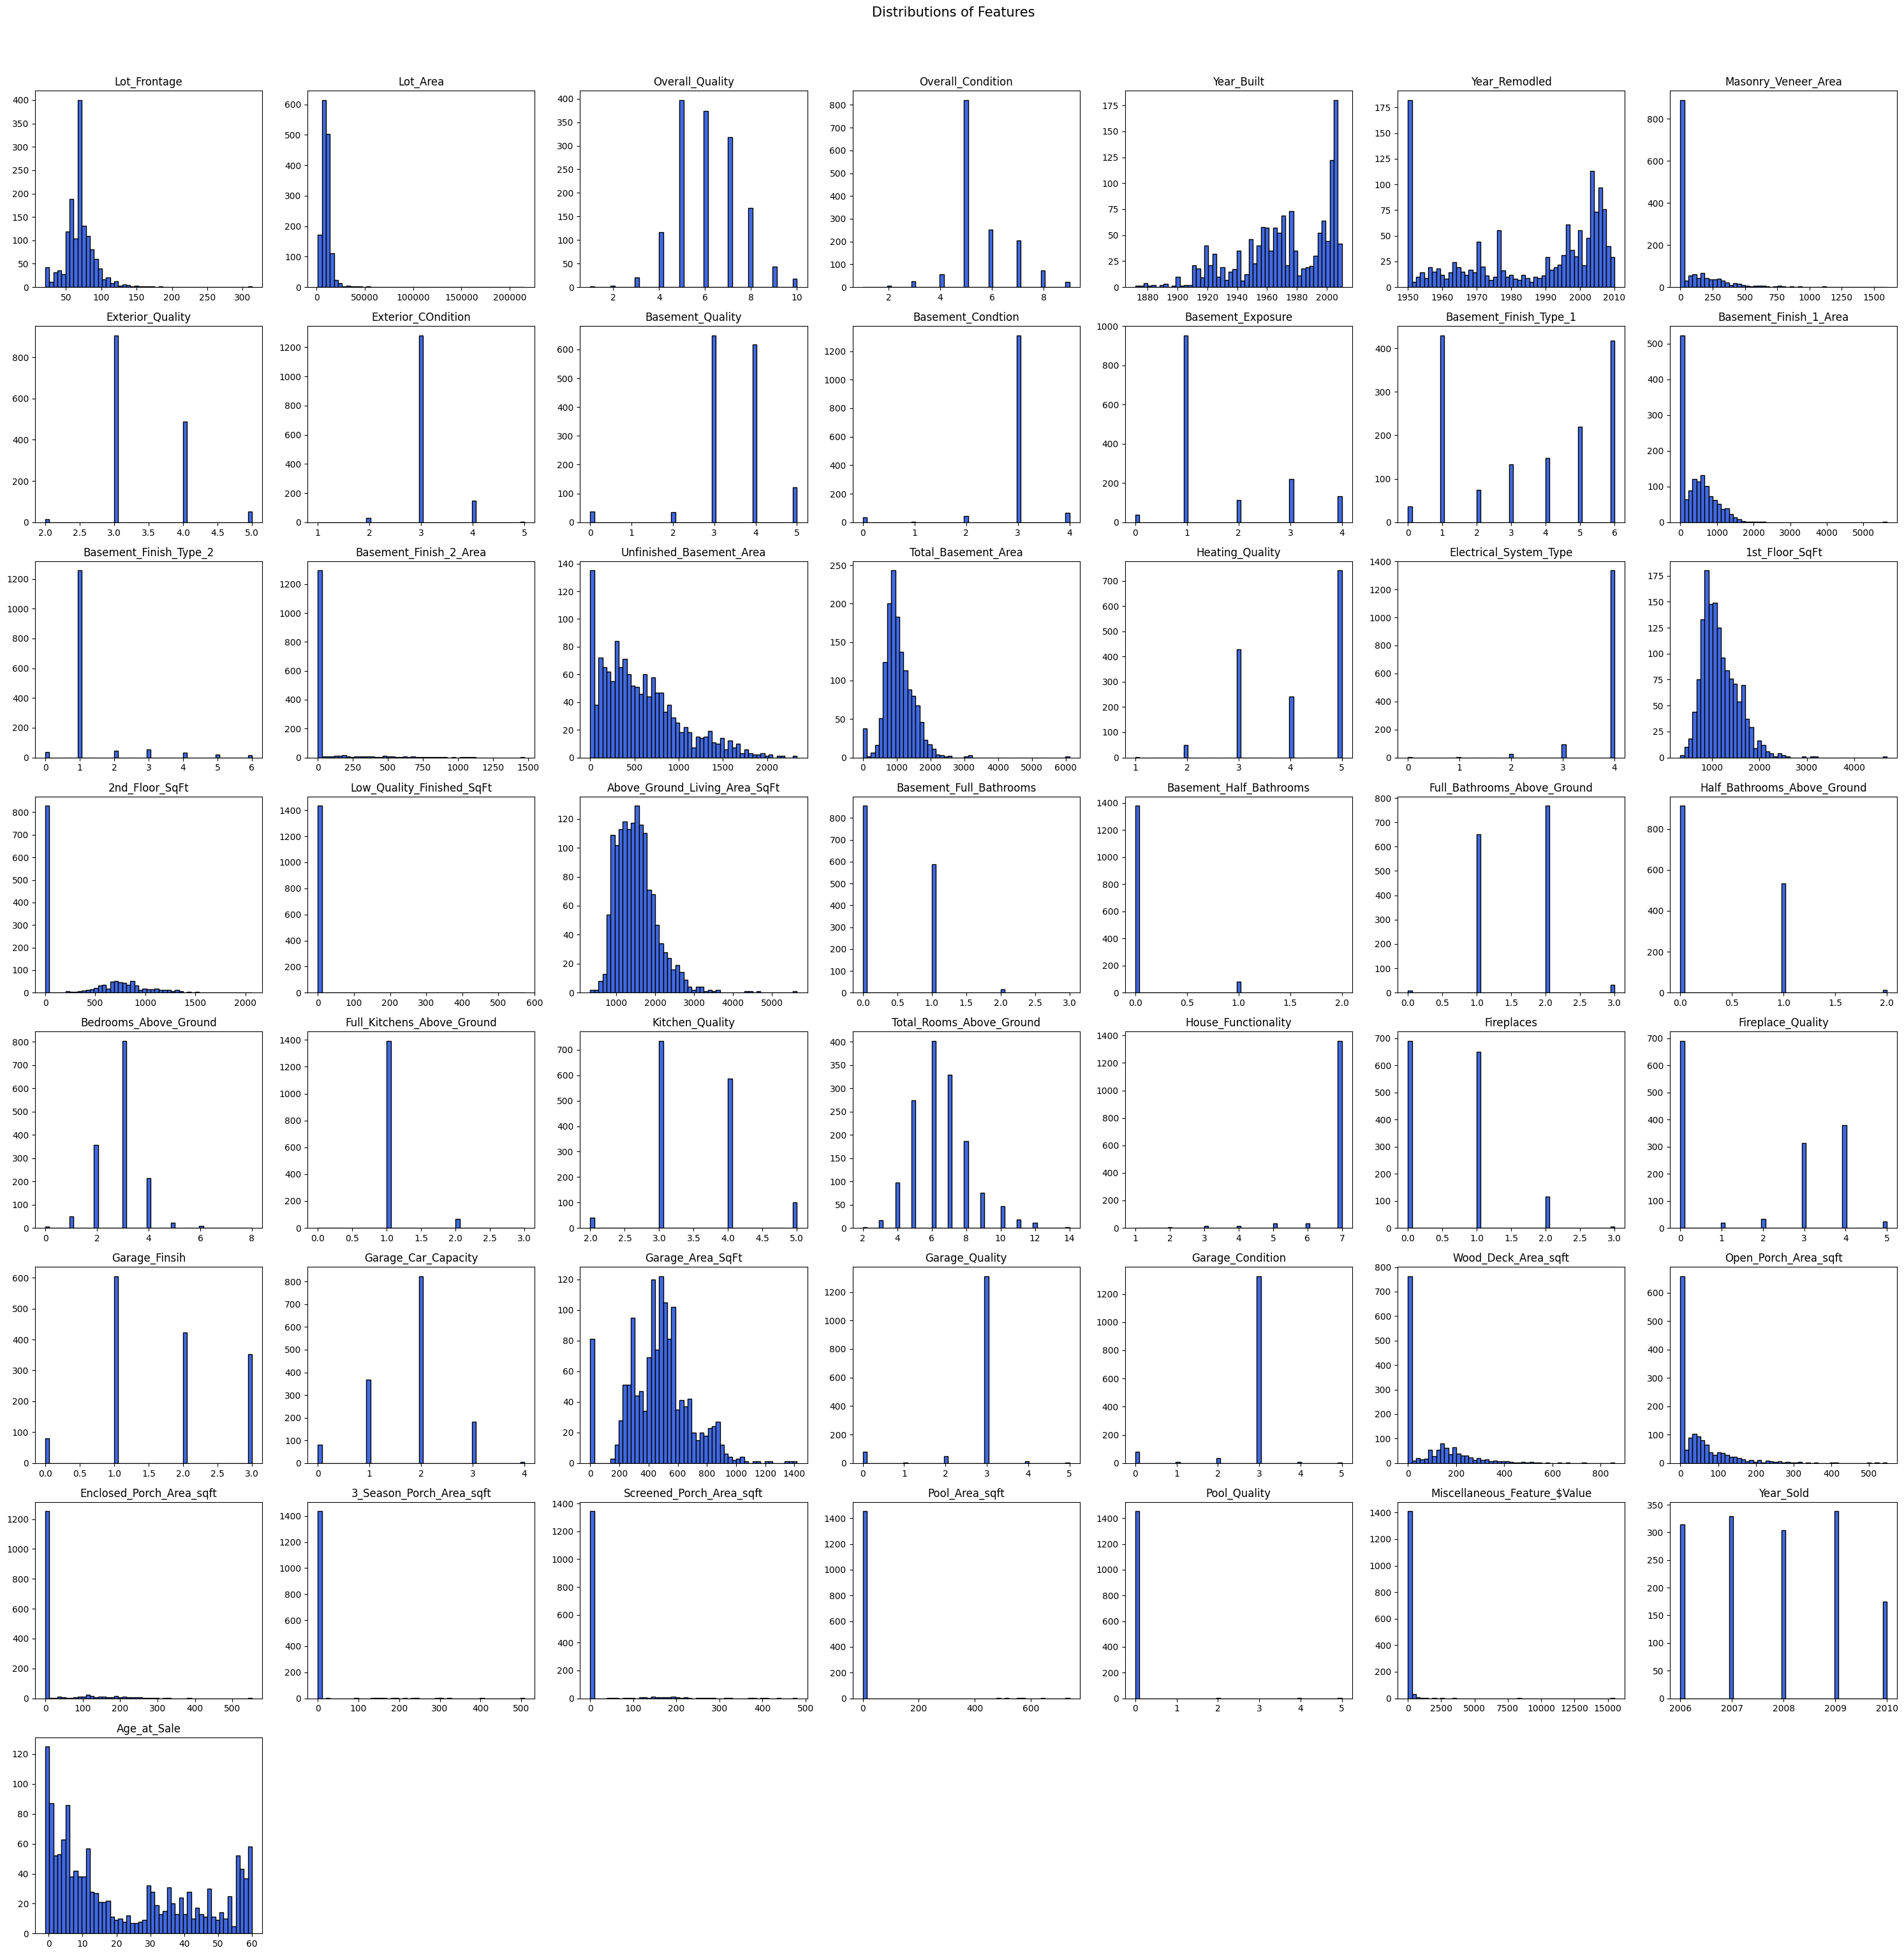

In [108]:
df_vis.drop(columns='Sale_Price').hist(figsize=(30, 30), bins = len(df_vis.columns), edgecolor = 'black', grid = False, color = 'royalblue')
plt.suptitle('Distributions of Features', x = 0.5, y = 1.02, size = 15)
#plt.axvline(df[column].mean(), color = "red")
plt.tight_layout()


Closer Look:

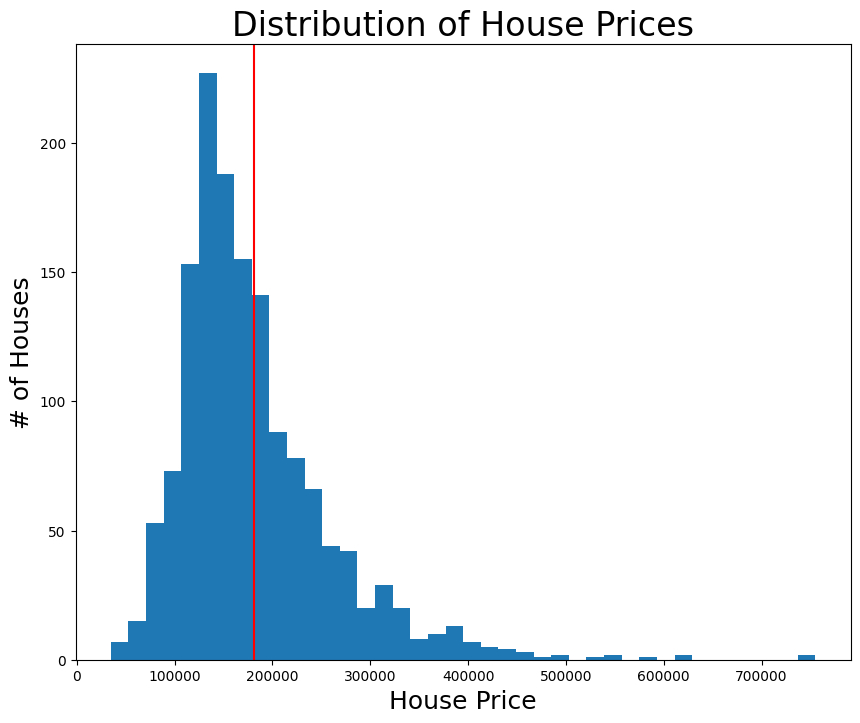

In [109]:
create_histogram(df_vis, 
             "Sale_Price", 
             "Distribution of House Prices", 
             "House Price", 
             "# of Houses")

__Interpretation:__ Right Skewed: Distribution close to normal with outliers on the more expensive side.

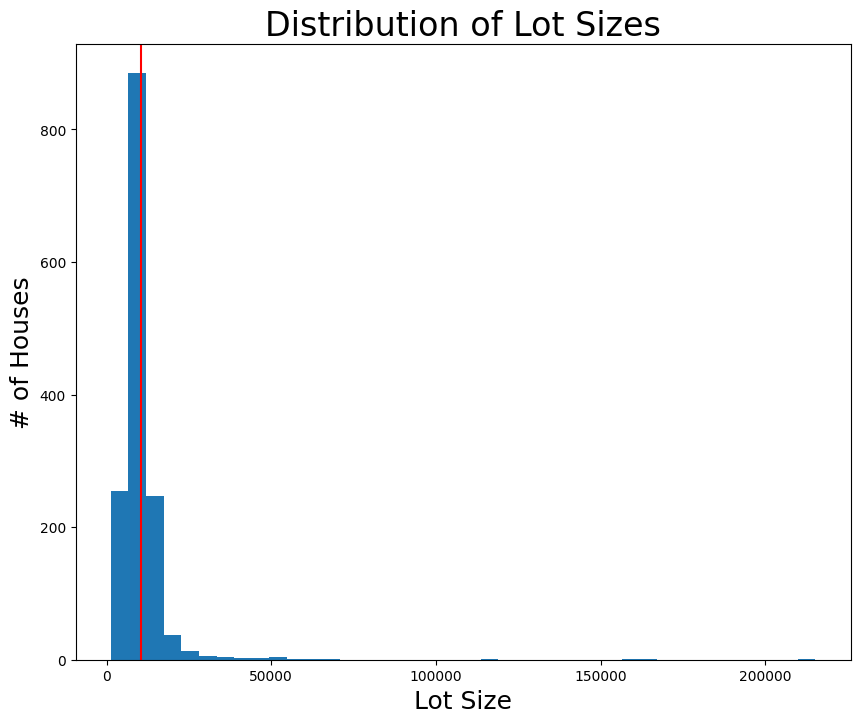

In [110]:
create_histogram(df_vis, 
             "Lot_Area", 
             "Distribution of Lot Sizes", 
             "Lot Size", 
             "# of Houses")

In [111]:
df_vis['Lot_Area'].describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: Lot_Area, dtype: float64

__Interpretation:__ Right Skewed: Majority of houses are ~ the minimum lot size with a few extreme outliers.

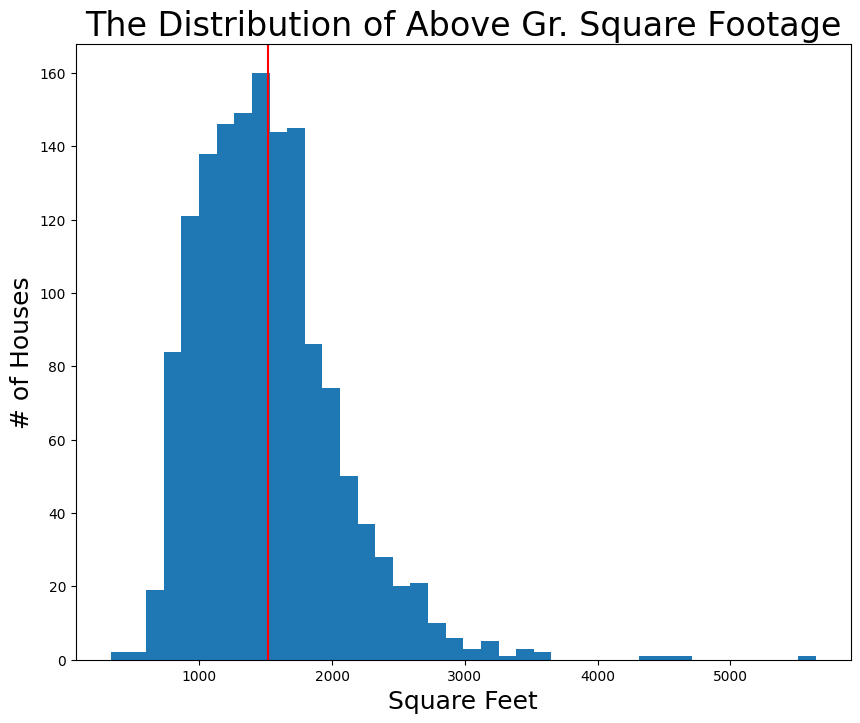

In [112]:
create_histogram(df_vis, 
             "Above_Ground_Living_Area_SqFt", 
             "The Distribution of Above Gr. Square Footage", 
             "Square Feet", 
             "# of Houses")

__Interpretation:__ Right Skewed: Houses have a wider range in sizes

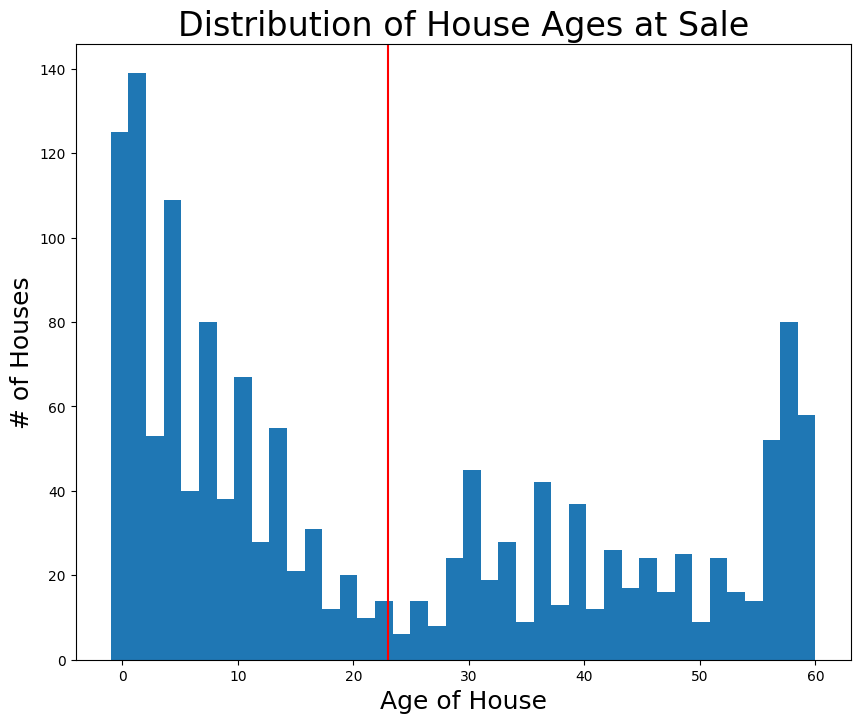

In [113]:
create_histogram(df_vis, 
             "Age_at_Sale", 
             "Distribution of House Ages at Sale", 
             "Age of House", 
             "# of Houses")

__Interpretation:__ ...

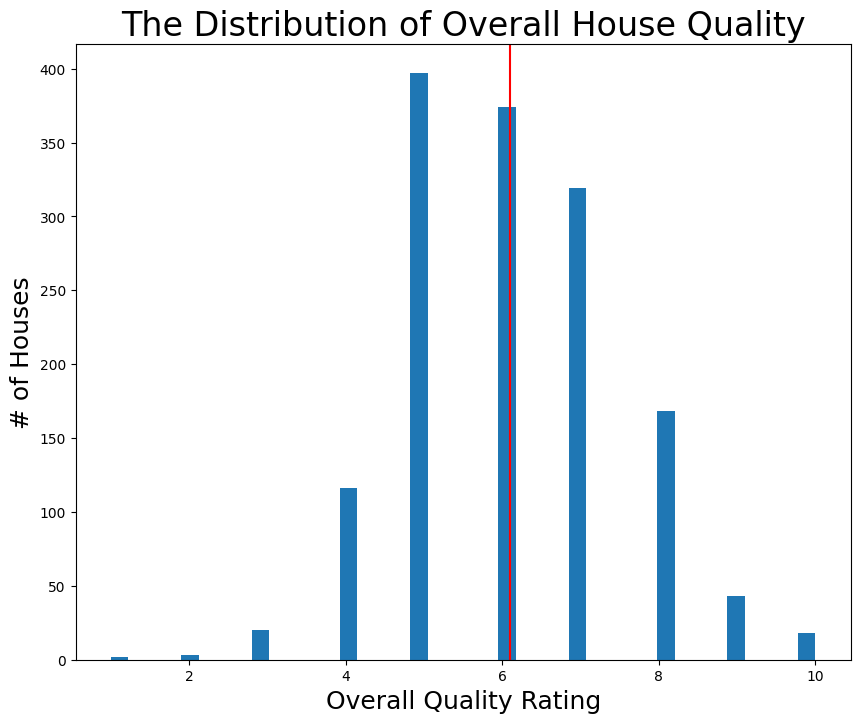

In [114]:
create_histogram(df_vis, 
             "Overall_Quality", 
             "The Distribution of Overall House Quality", 
             "Overall Quality Rating", 
             "# of Houses")

__Interpretation:__ ...

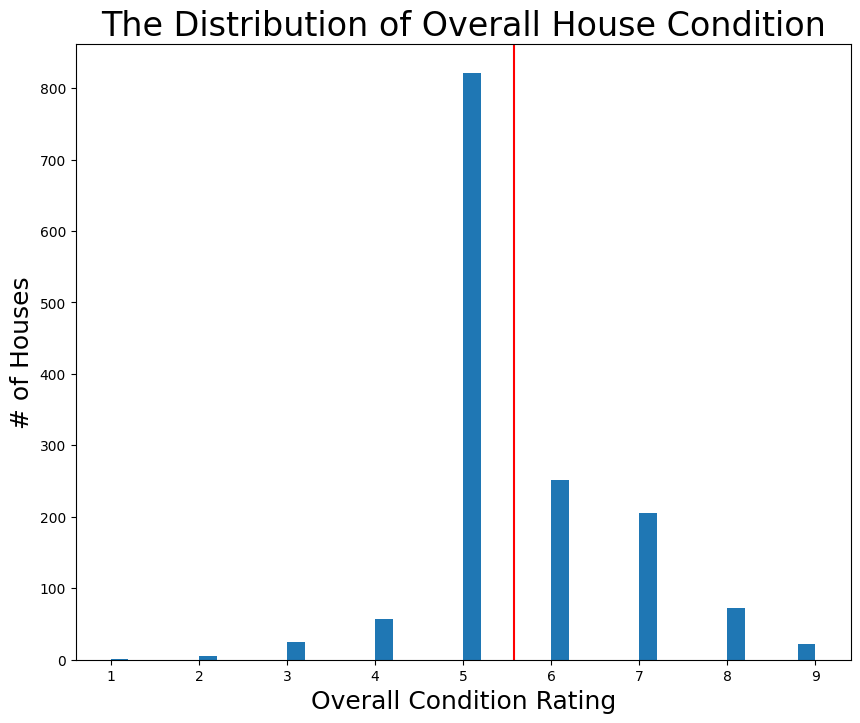

In [115]:
create_histogram(df_vis, 
             "Overall_Condition", 
             "The Distribution of Overall House Condition", 
             "Overall Condition Rating", 
             "# of Houses")

__Interpretation:__ ...

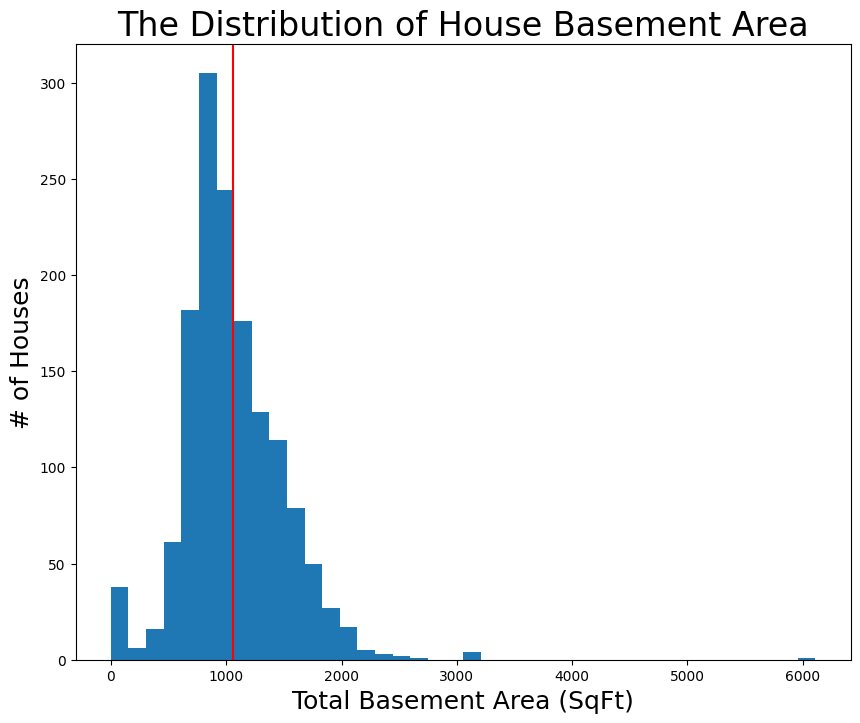

In [116]:
create_histogram(df_vis, 
             "Total_Basement_Area", 
             "The Distribution of House Basement Area", 
             "Total Basement Area (SqFt)", 
             "# of Houses")

__Interpretation:__ Normally Distributed (among houses with basements)

#### BoxPlots

/home/adam/Desktop/Projects/HousePricePrediction-LR/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/adam/Desktop/Projects/HousePricePrediction-LR/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


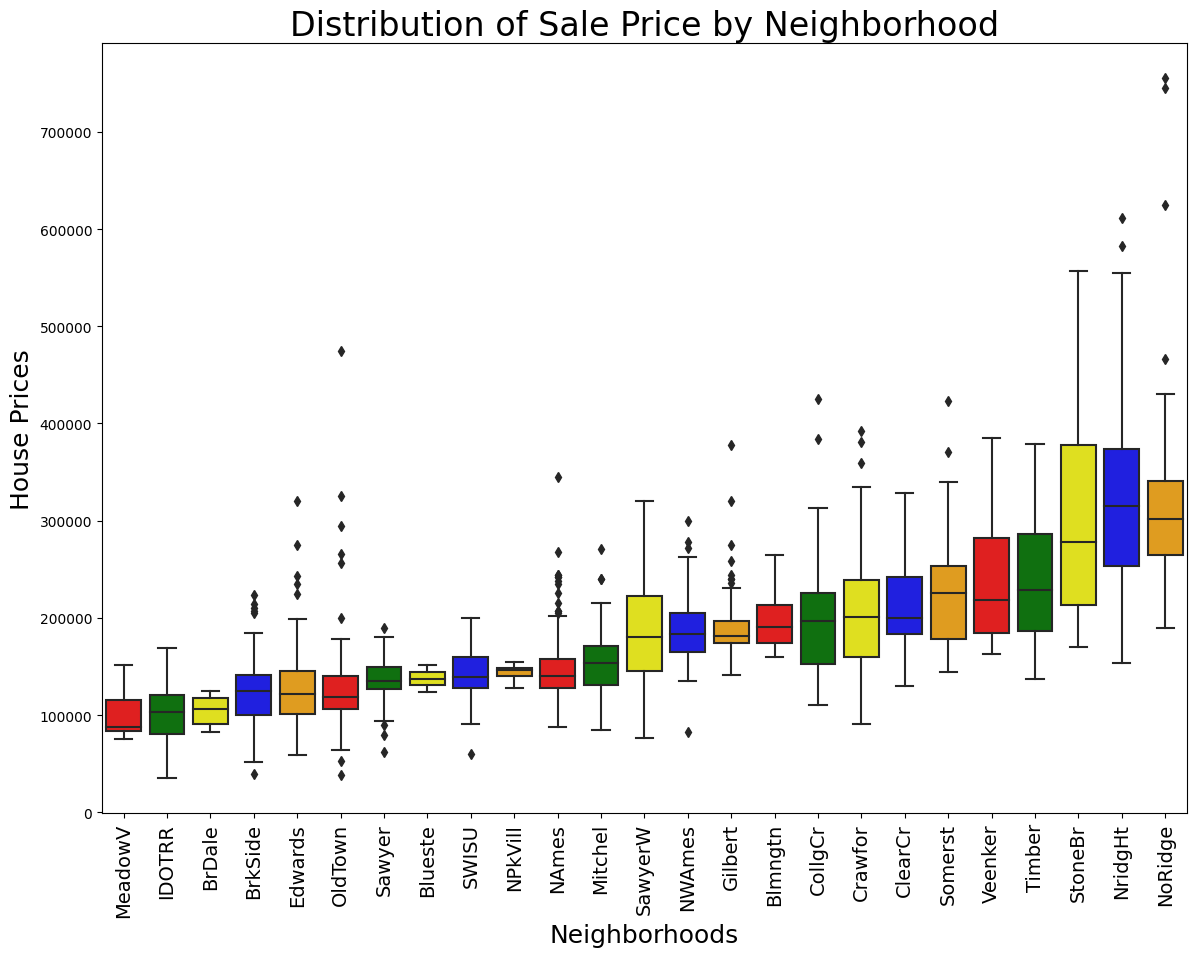

In [117]:
create_boxplot(df_train,
          "Neighborhood",
          "SalePrice",
          "Distribution of Sale Price by Neighborhood",
          "Neighborhoods",
          "House Prices",
          (14,10))

(Add other boxplots)...

#### ScatterPlots

/home/adam/Desktop/Projects/HousePricePrediction-LR/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/adam/Desktop/Projects/HousePricePrediction-LR/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


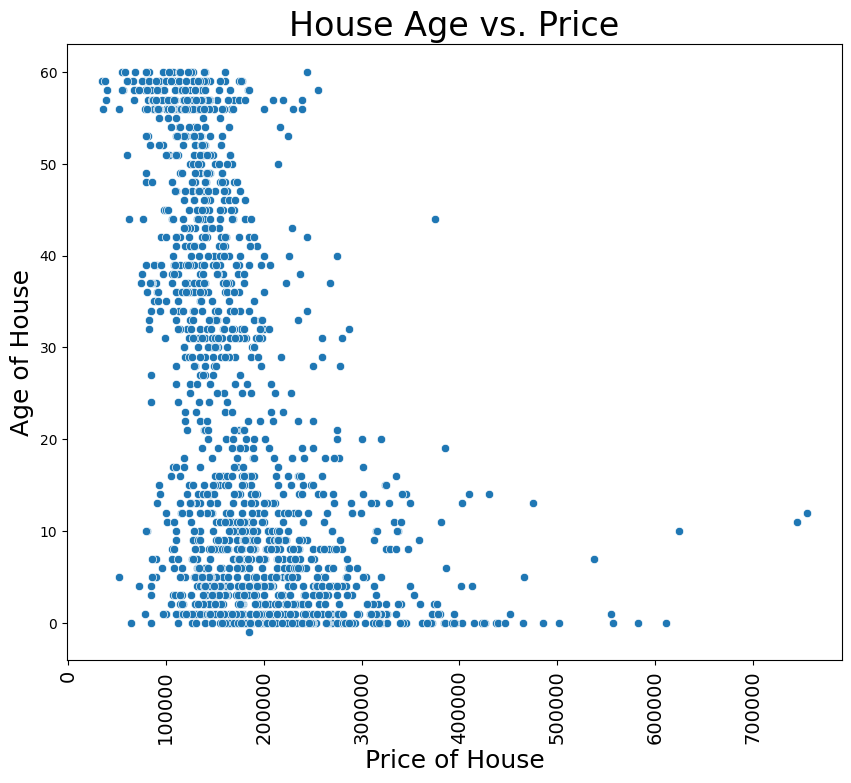

In [118]:
create_scatterplot(df_vis,
              "Sale_Price",
              "Age_at_Sale",
              "House Age vs. Price",
              "Price of House",
              "Age of House",
              (10,8))

__Interpretation:__ Spread of house prices compared to their age: Houses selling for the most were built within the last 20 years.

/home/adam/Desktop/Projects/HousePricePrediction-LR/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/adam/Desktop/Projects/HousePricePrediction-LR/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


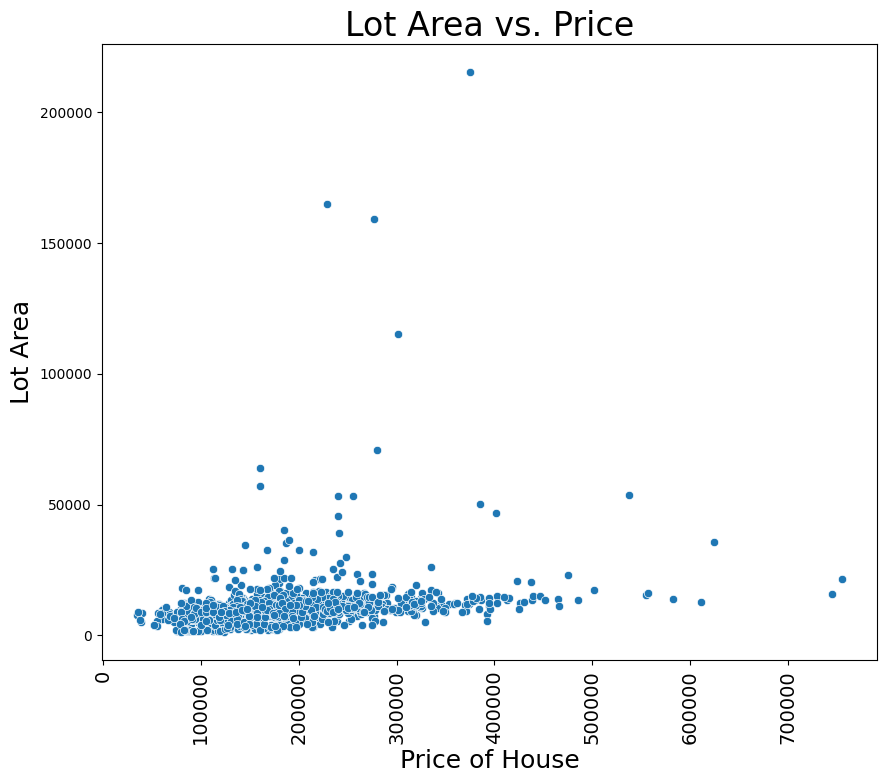

In [119]:
create_scatterplot(df_vis,
              "Sale_Price",
              "Lot_Area",
              "Lot Area vs. Price",
              "Price of House",
              "Lot Area",
              (10,8))

__Interpretation:__ Prices of houses compared to the lot size: Outliers exist that should be removed before model creation

/home/adam/Desktop/Projects/HousePricePrediction-LR/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/adam/Desktop/Projects/HousePricePrediction-LR/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


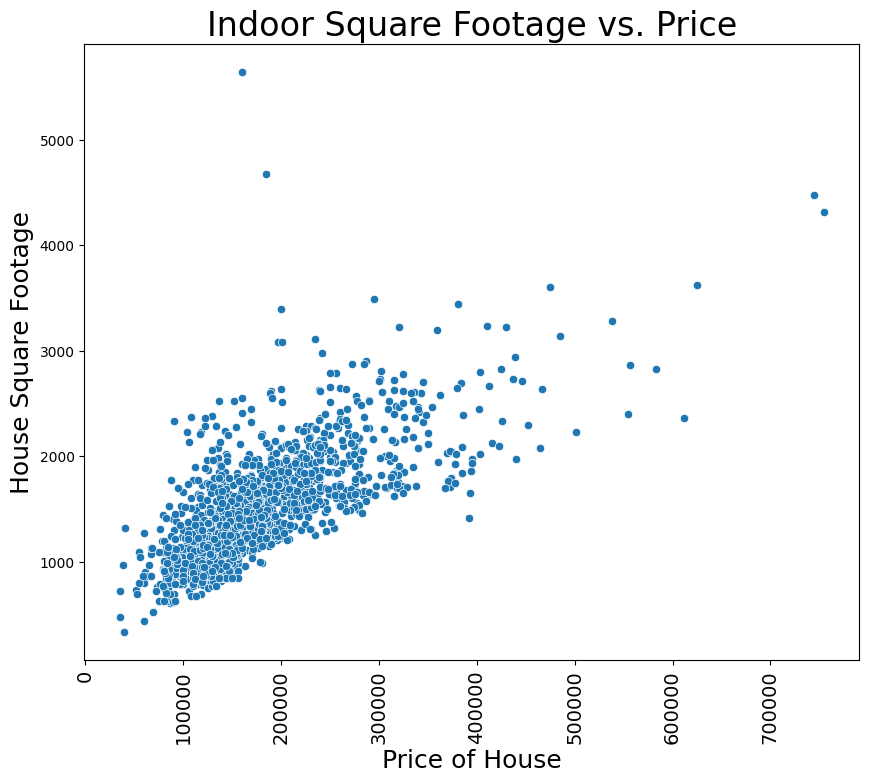

In [120]:
create_scatterplot(df_vis,
              "Sale_Price",
              "Above_Ground_Living_Area_SqFt",
              "Indoor Square Footage vs. Price",
              "Price of House",
              "House Square Footage",
              (10,8))

__Interpretation:__ Price of house compared to square footage of the house interior: Clear upward correlation between these 2 features

### Heatmap

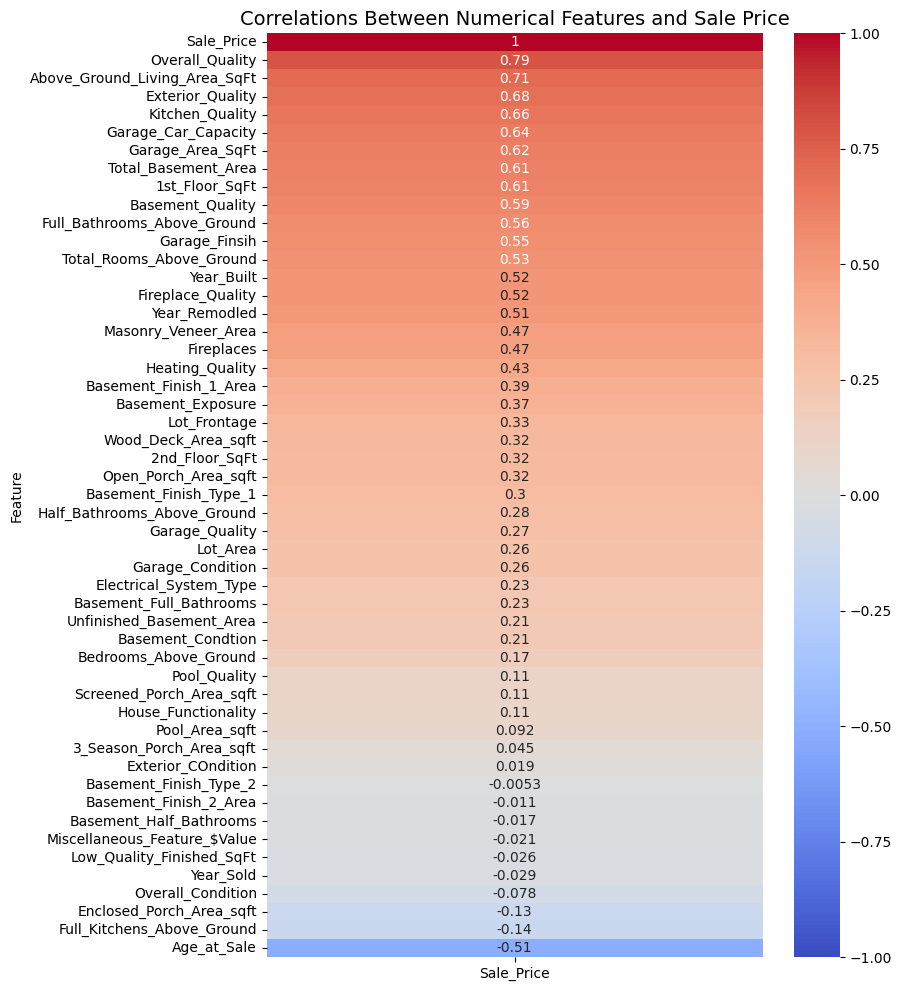

In [121]:
corr_matrix = df_vis.corr()[['Sale_Price']].sort_values('Sale_Price', ascending=False)
create_heatmap(corr_matrix)

##### 2nd Heatmap of Most Highly Correlated Features

In [122]:
high_corr = list(df_vis.corr()["Sale_Price"].sort_values(ascending = False).index[:10])
# And add on all of our negatively correlated variables lower than -0.5
high_corr += list(df_vis.corr()["Sale_Price"].sort_values().index[:2])

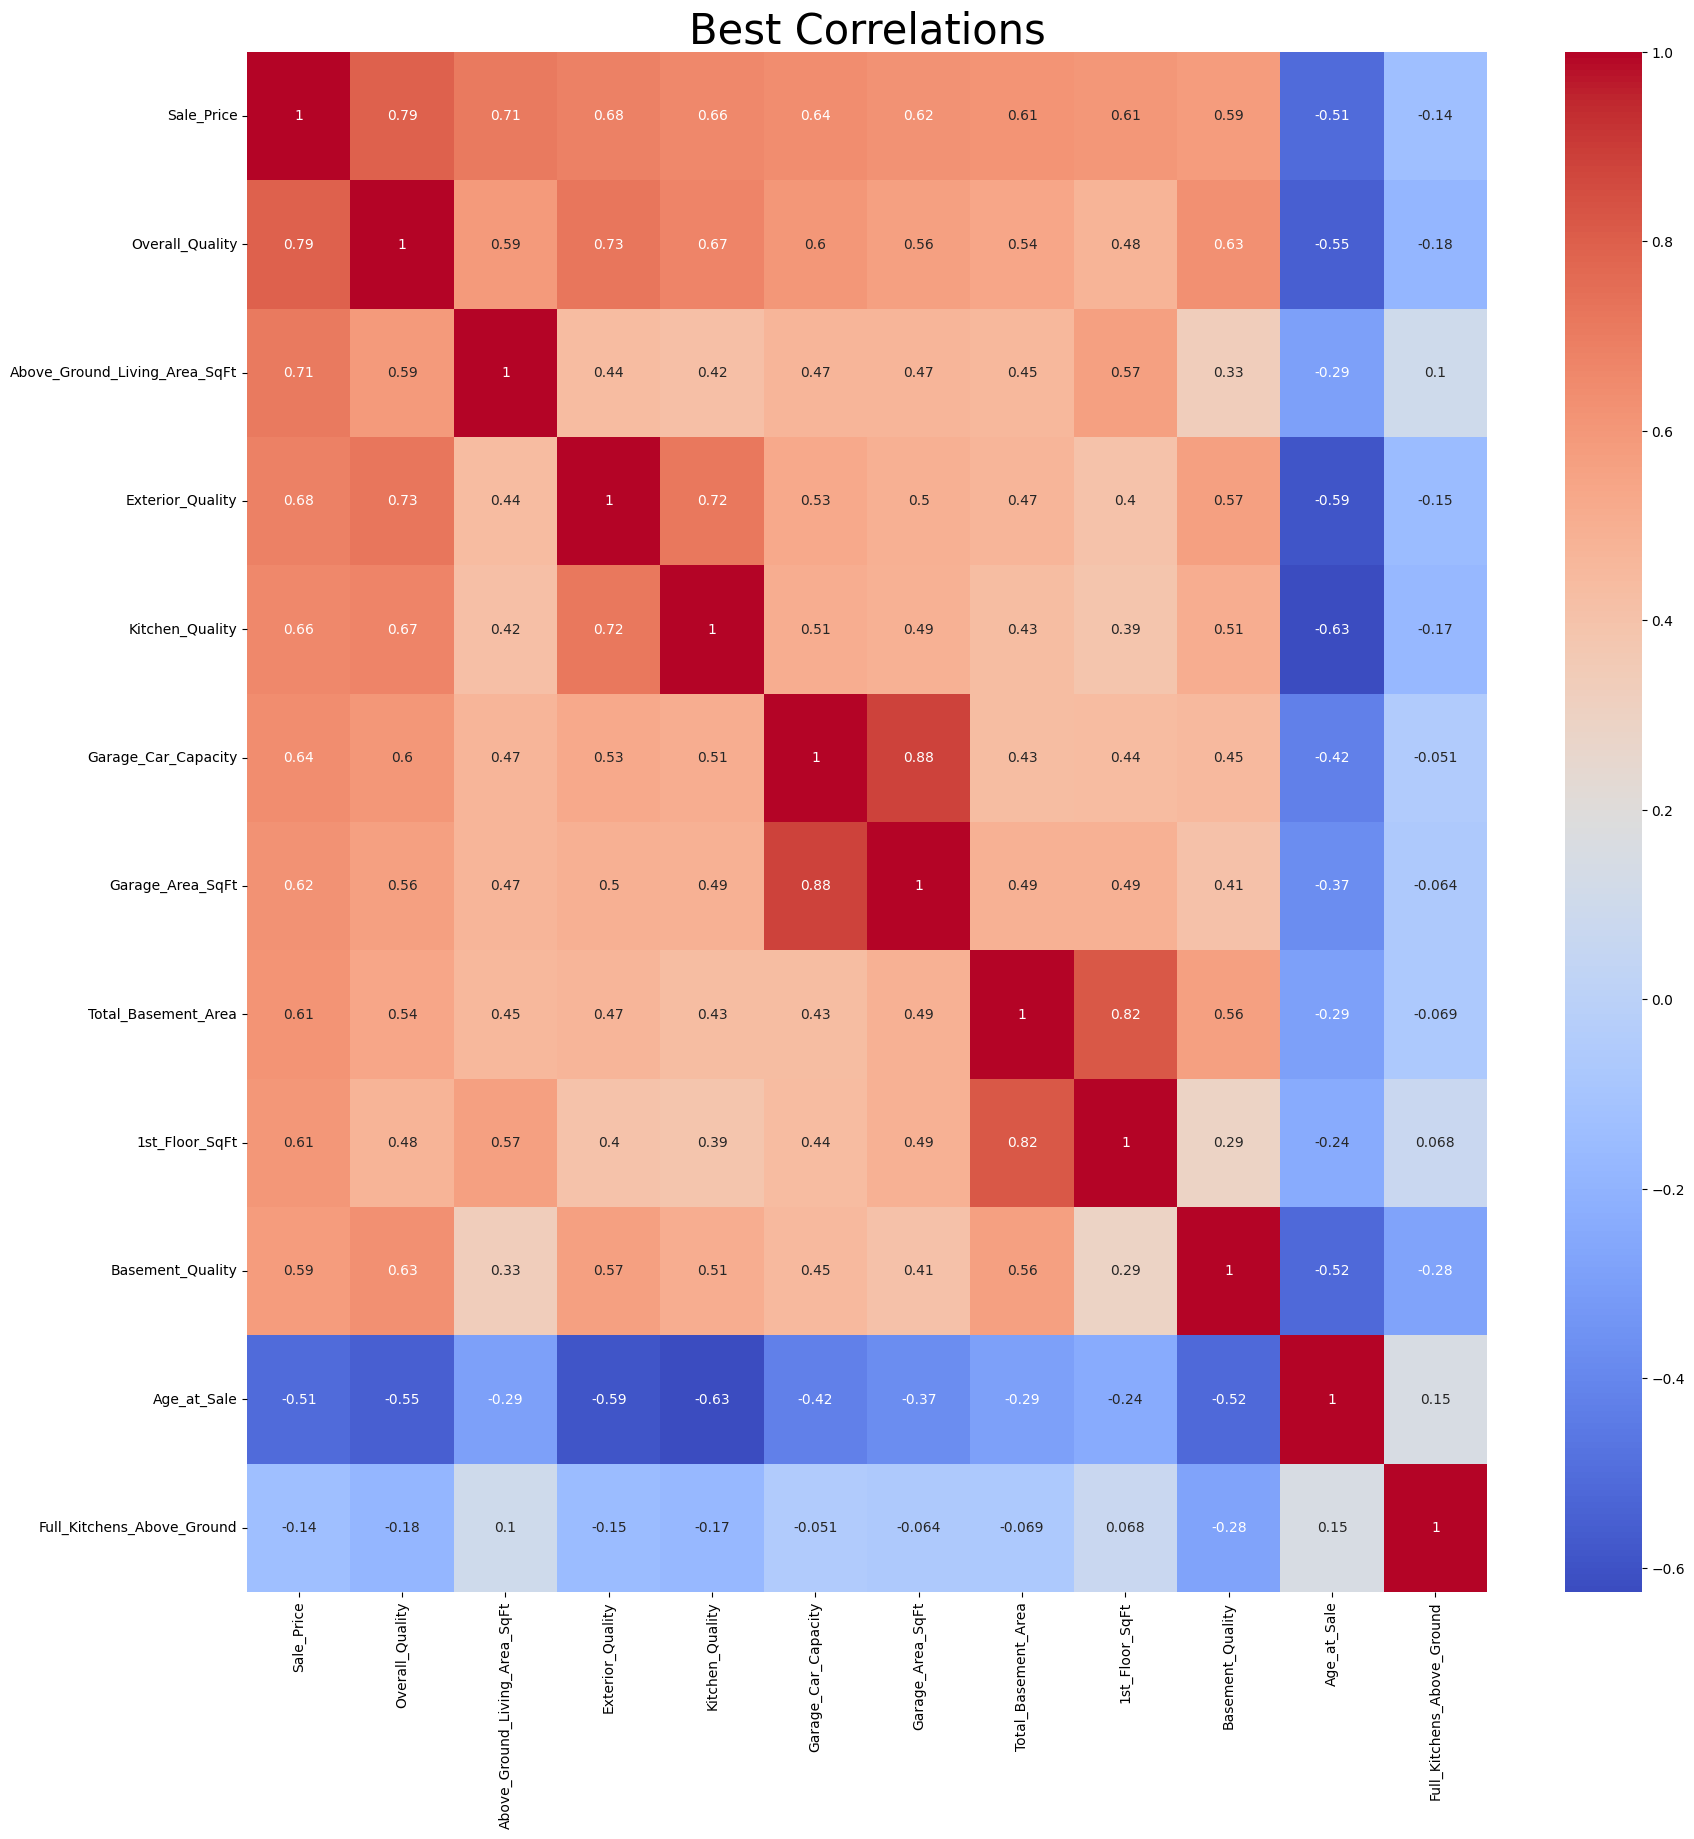

In [123]:
high_corr_df = df_vis[high_corr]
plt.figure(figsize=(20, 20)) # size of the graph
plt.title('Best Correlations', fontsize = 30)
sns.heatmap(high_corr_df.corr(),
            annot=True,
            cmap='coolwarm');

Important correlations to the sale price include:
- Overall Quality
- House size
- Kitchen Quality
- Exterior Quality
- Age of the house
- Garage size
- Basement Size

## Feature Engineering

Interaction column b/w house size and lot size

In [124]:
df_train["house_and_lot_size"] = df_train["LotArea"] * df_train["GrLivArea"]
df_test["house_and_lot_size"] = df_test["LotArea"] * df_test["GrLivArea"]

#### Dummify

In [125]:
categorical = []
for column in list(df_train.columns):
    if df_train[column].dtype == object:
        categorical.append(column)

categorical

['Id',
 'MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'Heating',
 'CentralAir',
 'GarageType',
 'GarageYrBlt',
 'PavedDrive',
 'Fence',
 'MiscFeature',
 'MoSold',
 'SaleType',
 'SaleCondition']

In [126]:
categorical.remove('Id')

In [127]:
df_train = pd.get_dummies(df_train, columns = categorical, drop_first= True)
df_train.shape

(1460, 329)

In [128]:
df_test = pd.get_dummies(df_test, columns = categorical, drop_first= True)
df_test.shape

(1459, 313)

In [129]:
extra_columns = []
for column in df_train.columns:
    if column not in df_test.columns:
        extra_columns.append(column)
extra_columns

['SalePrice',
 'Age_at_Sale',
 'MSSubClass_20',
 'Utilities_NoSeWa',
 'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'HouseStyle_2.5Fin',
 'RoofMatl_CompShg',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'Exterior1st_ImStucc',
 'Exterior1st_Stone',
 'Exterior2nd_Other',
 'Heating_GasA',
 'Heating_OthW',
 'GarageYrBlt_1906.0',
 'GarageYrBlt_1908.0',
 'GarageYrBlt_1914.0',
 'GarageYrBlt_1929.0',
 'GarageYrBlt_1931.0',
 'GarageYrBlt_1933.0',
 'MiscFeature_TenC',
 'MoSold_August',
 'MoSold_December',
 'MoSold_February',
 'MoSold_January',
 'MoSold_July',
 'MoSold_June',
 'MoSold_March',
 'MoSold_May',
 'MoSold_November',
 'MoSold_October',
 'MoSold_September']

In [130]:
extra_columns.remove('SalePrice')

In [131]:
df_train.drop(columns=extra_columns, inplace=True)
df_train.shape

(1460, 295)

## Model Prep.

In [132]:
X = df_train.drop(columns = ["SalePrice", "Id"])
# Select our target
y = df_train["SalePrice"]

In [133]:
X.shape

(1460, 293)

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state  = 613, train_size = 0.75)

Scale Data

In [135]:
ss = StandardScaler()
# fit and transform X_train
X_train_sc = ss.fit_transform(X_train)
# transform X_test
X_test_sc = ss.transform(X_test)

## Model Creation

Function to return a dataframe of metrics and cross val scores

In [136]:
def df_scores(model, training_df, testing_df, model_name, alpha = None):
    list1 = ["Training R2", "Testing R2", "Cross Validation Mean", "Best Alpha"]            # List of types of scores
    list2 = [round(model.score(training_df, y_train), 3),                                   # List with our actual scores
             round(model.score(testing_df, y_test), 3),
             round(cross_val_score(model, training_df, y_train, cv = 5).mean(), 3),
             alpha]
    for position, i in enumerate(cross_val_score(model, training_df, y_train, cv = 5)):     # Loop through cross vals and return each score
        # add our new row name
        list1.append(f"Cross Validation R2, Fold {position + 1}") 
        # add the cross val score
        list2.append(round(i, 3))
        
    df = pd.DataFrame(list(zip(list1, list2)), columns =[model_name, 'Score'])
    return df

#### Baseline Model (Sklearn Dummy Regressor)

In [137]:
dummy = DummyRegressor(strategy = "mean")

dummy.fit(X_train, y_train)

DummyRegressor()

In [138]:
dummy_preds = dummy.predict(X_train)

dummy_mse = metrics.mean_squared_error(y_train, dummy_preds)

dummy_rmse = np.sqrt(dummy_mse)
dummy_rmse

80317.98406337456

#### LR Model 1

In [139]:
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [140]:
df_scores(lr, X_train, X_test, "Linear Regression 1")

,Linear Regression 1,Score
0,Training R2,0.920
1,Testing R2,0.828
2,Cross Validation Mean,0.722
3,Best Alpha,NaN
4,"Cross Validation R2, Fold 1",0.801
5,"Cross Validation R2, Fold 2",0.832
6,"Cross Validation R2, Fold 3",0.468
7,"Cross Validation R2, Fold 4",0.717
8,"Cross Validation R2, Fold 5",0.792


In [141]:
pd.DataFrame(zip(X.columns,lr.coef_), columns=['Feature', 'Model Coef.']).head()

,Feature,Model Coef.
0,LotFrontage,-72.667998
1,LotArea,5.556777
2,OverallQual,8881.068948
3,OverallCond,6076.618615
4,YearBuilt,209.772940


#### Ridge Regression Model 1

In [142]:
ridge_alphas = np.logspace(0, 5, 101)

ridge = RidgeCV(alphas = ridge_alphas, scoring = "r2", cv = 5)

ridge.fit(X_train_sc, y_train)

RidgeCV(alphas=array([1.00000000e+00, 1.12201845e+00, 1.25892541e+00, 1.41253754e+00,
       1.58489319e+00, 1.77827941e+00, 1.99526231e+00, 2.23872114e+00,
       2.51188643e+00, 2.81838293e+00, 3.16227766e+00, 3.54813389e+00,
       3.98107171e+00, 4.46683592e+00, 5.01187234e+00, 5.62341325e+00,
       6.30957344e+00, 7.07945784e+00, 7.94328235e+00, 8.91250938e+00,
       1.00000000e+01, 1.12201845e+0...
       6.30957344e+03, 7.07945784e+03, 7.94328235e+03, 8.91250938e+03,
       1.00000000e+04, 1.12201845e+04, 1.25892541e+04, 1.41253754e+04,
       1.58489319e+04, 1.77827941e+04, 1.99526231e+04, 2.23872114e+04,
       2.51188643e+04, 2.81838293e+04, 3.16227766e+04, 3.54813389e+04,
       3.98107171e+04, 4.46683592e+04, 5.01187234e+04, 5.62341325e+04,
       6.30957344e+04, 7.07945784e+04, 7.94328235e+04, 8.91250938e+04,
       1.00000000e+05]),
        cv=5, scoring='r2')

In [143]:
df_scores(ridge, X_train_sc, X_test_sc, "Ridge 1", alpha = round(ridge.alpha_, 3))

,Ridge 1,Score
0,Training R2,0.871
1,Testing R2,0.861
2,Cross Validation Mean,0.772
3,Best Alpha,707.946
4,"Cross Validation R2, Fold 1",0.799
5,"Cross Validation R2, Fold 2",0.857
6,"Cross Validation R2, Fold 3",0.587
7,"Cross Validation R2, Fold 4",0.792
8,"Cross Validation R2, Fold 5",0.826


In [144]:
pd.DataFrame(zip(X.columns, ridge.coef_), columns= ["Feature", "Ridge_Coefs"]).head()

,Feature,Ridge_Coefs
0,LotFrontage,68.542884
1,LotArea,2989.369100
2,OverallQual,7431.031035
3,OverallCond,2354.695813
4,YearBuilt,1294.172920


#### LASSO Model 1

In [145]:
lasso_alphas = np.logspace(0, 5, 100)
lasso = LassoCV(
    alphas = lasso_alphas, 
    cv = 5, 
    max_iter = 10000)

lasso.fit(X_train_sc, y_train)

LassoCV(alphas=array([1.00000000e+00, 1.12332403e+00, 1.26185688e+00, 1.41747416e+00,
       1.59228279e+00, 1.78864953e+00, 2.00923300e+00, 2.25701972e+00,
       2.53536449e+00, 2.84803587e+00, 3.19926714e+00, 3.59381366e+00,
       4.03701726e+00, 4.53487851e+00, 5.09413801e+00, 5.72236766e+00,
       6.42807312e+00, 7.22080902e+00, 8.11130831e+00, 9.11162756e+00,
       1.02353102e+01, 1.14975700e+0...
       6.89261210e+03, 7.74263683e+03, 8.69749003e+03, 9.77009957e+03,
       1.09749877e+04, 1.23284674e+04, 1.38488637e+04, 1.55567614e+04,
       1.74752840e+04, 1.96304065e+04, 2.20513074e+04, 2.47707636e+04,
       2.78255940e+04, 3.12571585e+04, 3.51119173e+04, 3.94420606e+04,
       4.43062146e+04, 4.97702356e+04, 5.59081018e+04, 6.28029144e+04,
       7.05480231e+04, 7.92482898e+04, 8.90215085e+04, 1.00000000e+05]),
        cv=5, max_iter=10000)

In [146]:
df_scores(lasso, X_train_sc, X_test_sc, "LASSO Model 1", alpha = round(lasso.alpha_, 3))

,LASSO Model 1,Score
0,Training R2,0.904
1,Testing R2,0.874
2,Cross Validation Mean,0.759
3,Best Alpha,422.924
4,"Cross Validation R2, Fold 1",0.814
5,"Cross Validation R2, Fold 2",0.877
6,"Cross Validation R2, Fold 3",0.535
7,"Cross Validation R2, Fold 4",0.774
8,"Cross Validation R2, Fold 5",0.795


In [147]:
df_lasso = pd.DataFrame(zip(X.columns, lasso.coef_), columns= ["Features", "Lasso Coefs"])
df_lasso.head()

,Features,Lasso Coefs
0,LotFrontage,-944.065174
1,LotArea,27712.321327
2,OverallQual,14117.546193
3,OverallCond,4816.873045
4,YearBuilt,3725.817556


Find features that lasso model has shrunk to 0/-0

In [148]:
to_zero = df_lasso.loc[df_lasso['Lasso Coefs'] == 0]
print(to_zero.shape)
to_zero


(128, 2)


,Features,Lasso Coefs
8,ExterCond,-0.0
14,BsmtFinType2,0.0
16,BsmtUnfSF,-0.0
17,TotalBsmtSF,0.0
20,1stFlrSF,0.0
...,...,...
279,MiscFeature_Shed,0.0
282,SaleType_ConLD,-0.0
284,SaleType_ConLw,-0.0
287,SaleType_WD,0.0


In [149]:
# List of columns that lasso has deemed unnecessary
drop_list = list(to_zero['Features'])

#### Linear Regression Model 2

In [150]:
X2 = df_train.drop(columns = [*drop_list, "SalePrice", "Id"])

y2 = df_train["SalePrice"]

In [151]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state  = 613, train_size = 0.75)

In [152]:
ss = StandardScaler()
X2_train_sc = ss.fit_transform(X2_train)
X2_test_sc = ss.transform(X2_test)

In [153]:
lr2 = LinearRegression()

lr2.fit(X2_train, y2_train)

LinearRegression()

In [154]:
df_scores(lr2, X2_train, X2_test,"Linear Regression Model 2")

,Linear Regression Model 2,Score
0,Training R2,0.914
1,Testing R2,0.843
2,Cross Validation Mean,0.811
3,Best Alpha,NaN
4,"Cross Validation R2, Fold 1",0.857
5,"Cross Validation R2, Fold 2",0.870
6,"Cross Validation R2, Fold 3",0.663
7,"Cross Validation R2, Fold 4",0.810
8,"Cross Validation R2, Fold 5",0.854


#### Ridge Model 2

In [155]:
ridge_alphas = np.logspace(0, 5, 101)

ridge_2 = RidgeCV(
    alphas = ridge_alphas,
    scoring = "r2",
    cv = 5)

ridge_2.fit(X2_train_sc, y_train)

RidgeCV(alphas=array([1.00000000e+00, 1.12201845e+00, 1.25892541e+00, 1.41253754e+00,
       1.58489319e+00, 1.77827941e+00, 1.99526231e+00, 2.23872114e+00,
       2.51188643e+00, 2.81838293e+00, 3.16227766e+00, 3.54813389e+00,
       3.98107171e+00, 4.46683592e+00, 5.01187234e+00, 5.62341325e+00,
       6.30957344e+00, 7.07945784e+00, 7.94328235e+00, 8.91250938e+00,
       1.00000000e+01, 1.12201845e+0...
       6.30957344e+03, 7.07945784e+03, 7.94328235e+03, 8.91250938e+03,
       1.00000000e+04, 1.12201845e+04, 1.25892541e+04, 1.41253754e+04,
       1.58489319e+04, 1.77827941e+04, 1.99526231e+04, 2.23872114e+04,
       2.51188643e+04, 2.81838293e+04, 3.16227766e+04, 3.54813389e+04,
       3.98107171e+04, 4.46683592e+04, 5.01187234e+04, 5.62341325e+04,
       6.30957344e+04, 7.07945784e+04, 7.94328235e+04, 8.91250938e+04,
       1.00000000e+05]),
        cv=5, scoring='r2')

In [156]:
df_scores(ridge_2, X2_train_sc, X2_test_sc, "Ridge Model 2", alpha = round(ridge_2.alpha_, 3))

,Ridge Model 2,Score
0,Training R2,0.914
1,Testing R2,0.844
2,Cross Validation Mean,0.802
3,Best Alpha,1.000
4,"Cross Validation R2, Fold 1",0.814
5,"Cross Validation R2, Fold 2",0.871
6,"Cross Validation R2, Fold 3",0.649
7,"Cross Validation R2, Fold 4",0.817
8,"Cross Validation R2, Fold 5",0.856


#### LASSO Model 2


In [157]:
lasso_alphas = np.logspace(0, 5, 100)

lasso2 = LassoCV(
    alphas = lasso_alphas, 
    cv = 5, 
    max_iter = 10000)

lasso2.fit(X2_train_sc, y_train)

LassoCV(alphas=array([1.00000000e+00, 1.12332403e+00, 1.26185688e+00, 1.41747416e+00,
       1.59228279e+00, 1.78864953e+00, 2.00923300e+00, 2.25701972e+00,
       2.53536449e+00, 2.84803587e+00, 3.19926714e+00, 3.59381366e+00,
       4.03701726e+00, 4.53487851e+00, 5.09413801e+00, 5.72236766e+00,
       6.42807312e+00, 7.22080902e+00, 8.11130831e+00, 9.11162756e+00,
       1.02353102e+01, 1.14975700e+0...
       6.89261210e+03, 7.74263683e+03, 8.69749003e+03, 9.77009957e+03,
       1.09749877e+04, 1.23284674e+04, 1.38488637e+04, 1.55567614e+04,
       1.74752840e+04, 1.96304065e+04, 2.20513074e+04, 2.47707636e+04,
       2.78255940e+04, 3.12571585e+04, 3.51119173e+04, 3.94420606e+04,
       4.43062146e+04, 4.97702356e+04, 5.59081018e+04, 6.28029144e+04,
       7.05480231e+04, 7.92482898e+04, 8.90215085e+04, 1.00000000e+05]),
        cv=5, max_iter=10000)

In [159]:
df_scores(lasso2, X2_train_sc, X2_test_sc, "Lasso Model 2", alpha = round(lasso2.alpha_, 3))

,Lasso Model 2,Score
0,Training R2,0.914
1,Testing R2,0.843
2,Cross Validation Mean,0.782
3,Best Alpha,1.000
4,"Cross Validation R2, Fold 1",0.857
5,"Cross Validation R2, Fold 2",0.870
6,"Cross Validation R2, Fold 3",0.552
7,"Cross Validation R2, Fold 4",0.775
8,"Cross Validation R2, Fold 5",0.854


In [160]:
df_lasso2 = pd.DataFrame(zip(X2.columns, lasso2.coef_),columns = ["Features", "Lasso Coefs"])
df_lasso2.head()

,Features,Lasso Coefs
0,LotFrontage,-1366.833683
1,LotArea,46852.136465
2,OverallQual,12652.303866
3,OverallCond,6382.687581
4,YearBuilt,7136.840595


In [161]:
df_lasso2.loc[df_lasso2['Lasso Coefs'] == 0].shape


(0, 2)

#### Linear Regression Model 3

In [ ]:
all_numeric = df_train.select_dtypes(include=np.number)


(51,)

In [ ]:
X3 = all_numeric

y = df_train["SalePrice"]

In [ ]:
X3_train, X3_test, y_train, y_test = train_test_split(X3, y, random_state  = 613, train_size = 0.5)
ss = StandardScaler()
X3_train_sc = ss.fit_transform(X3_train)
X3_test_sc = ss.transform(X3_test)

In [ ]:
lr3 = LinearRegression()

lr3.fit(X3_train,y_train)

LinearRegression()

In [ ]:
df_scores(lr3, X3_train, X3_test, "Linear Regression 3")

,Linear Regression 3,Score
0,Training R2,0.917
1,Testing R2,0.843
2,Cross Validation Mean,0.779
3,Best Alpha,NaN
4,"Cross Validation R2, Fold 1",0.736
5,"Cross Validation R2, Fold 2",0.778
6,"Cross Validation R2, Fold 3",0.731
7,"Cross Validation R2, Fold 4",0.825
8,"Cross Validation R2, Fold 5",0.823


## Line Assumptions

In [171]:
def preds_and_resids(model, df, target):
    # set a variable for our predictions
    y_pred = model.predict(df)
    # set a variable representing our residuals
    resids = target - y_pred
    return [y_pred, resids]

In [172]:
train_pred, train_resids = preds_and_resids(lr2, X2_train, y_train)

In [173]:
test_pred, test_resids = preds_and_resids(lr2, X2_test, y_test)

In [208]:

def plot_predictions(model_name, y_train_pred, y_test_pred, y_train_actual, y_test_actual, figsize):
    plt.figure(figsize = (figsize))
    # create a scatterplot of our Training data
    sns.scatterplot(x = y_train_pred, y = y_train_actual, label = "Training Data", color = "blue", alpha = .75)
    # Overlap it with a scatterplot of our testing data
    sns.scatterplot(x = y_test_pred, y = y_test_actual, label = "Testing Data", color = "green", alpha = .75)
    
    plt.title(model_name, fontsize = 25)
    plt.xlabel("Predicted Sale Price ŷ", fontsize = 20)
    plt.ylabel("Actual Sale Price - Y", fontsize = 20)
    plt.legend(loc = "upper left", fontsize = 15)
    # concatenate our values
    all_vals = np.concatenate([y_train_pred, y_test_pred, y_train_actual, y_test_actual])
    # determine our max value
    the_max_val = np.max(all_vals)
    # determine our minimum value
    the_min_val = np.min(all_vals)
    # plot a line through these 2 points
    plt.plot([the_min_val, the_max_val],[the_min_val, the_max_val], c='red')
    plt.tight_layout()

/home/adam/Desktop/Projects/HousePricePrediction-LR/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/adam/Desktop/Projects/HousePricePrediction-LR/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/adam/Desktop/Projects/HousePricePrediction-LR/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/adam/Desktop/Projects/HousePricePrediction-LR/.venv/lib/python3.11/site-packages/seaborn/_oldc

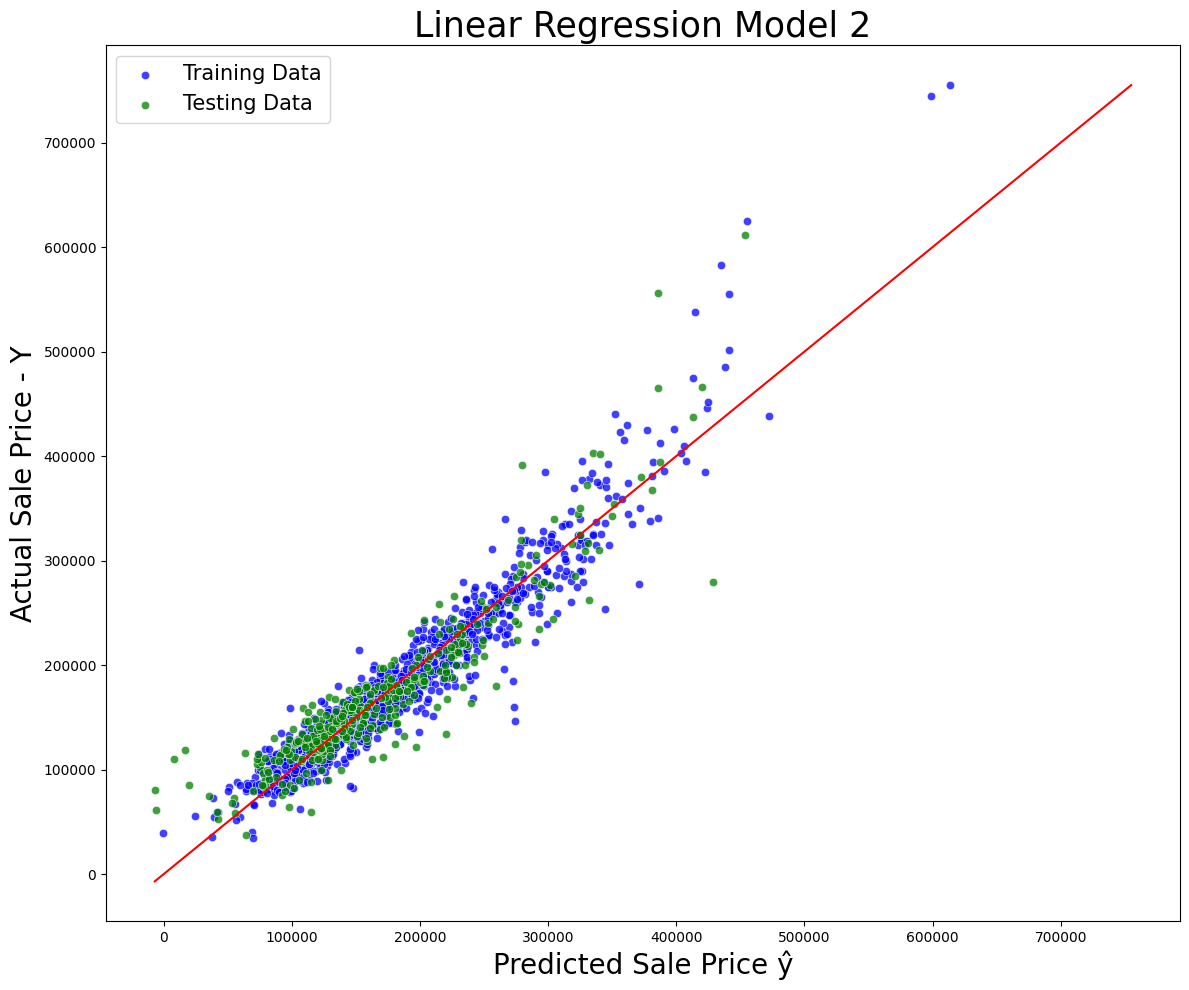

In [209]:
plot_predictions("Linear Regression Model 2",
                train_pred,
                test_pred,
                y_train,
                y_test,
                (12,10))

#### Residuals

In [206]:
def res_hist(training_residuals, testing_residuals):
    plt.figure(figsize = (12,8))
    plt.hist(training_residuals,
            bins = 20, color = "mediumblue", alpha = 0.7, label = "Training Data")
    plt.hist(testing_residuals, bins = 20, color = "green", alpha = 0.7, label = "Testing Data")
    plt.title("Distribution of Residuals", fontsize = 25)
    plt.xlabel("Residuals", fontsize = 20)
    plt.legend(loc = "upper left", fontsize = 15)
    plt.axvline(training_residuals.mean(), color = "red")

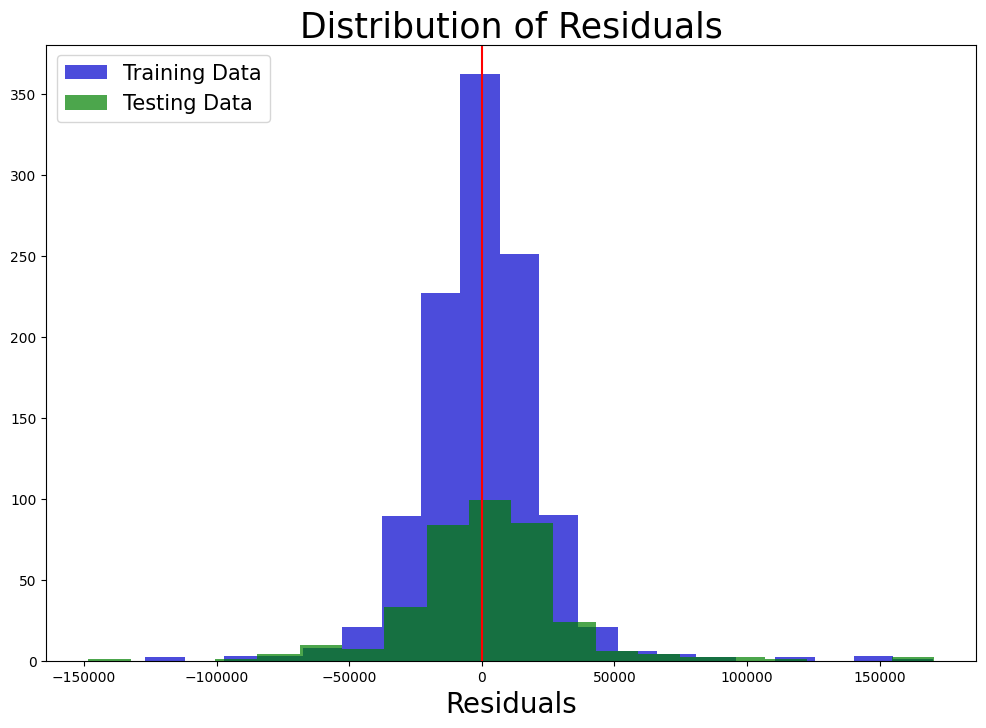

In [207]:
res_hist(train_resids, test_resids)

In [212]:
def resids_preds_scatter(training_predictions, training_residuals, testing_predictions, testing_residuals, homosced):
    plt.figure(figsize=(12,10))
    plt.scatter(training_predictions, training_residuals, color = "blue", label = "Training Data")
    plt.scatter(testing_predictions, testing_residuals, color = "green", label = "Testing Data")

    plt.axhline(0, color = "orange")
    plt.axhline(-homosced, color = "red", linestyle = "--")
    plt.axhline(homosced, color = "red", linestyle = "--")

    plt.title("Residuals vs. Predictions", fontsize = 25)
    plt.xlabel("Predicted Prices", fontsize = 20)
    plt.ylabel("Residuals", fontsize = 20)
    plt.legend(loc = "upper left", fontsize = 15)

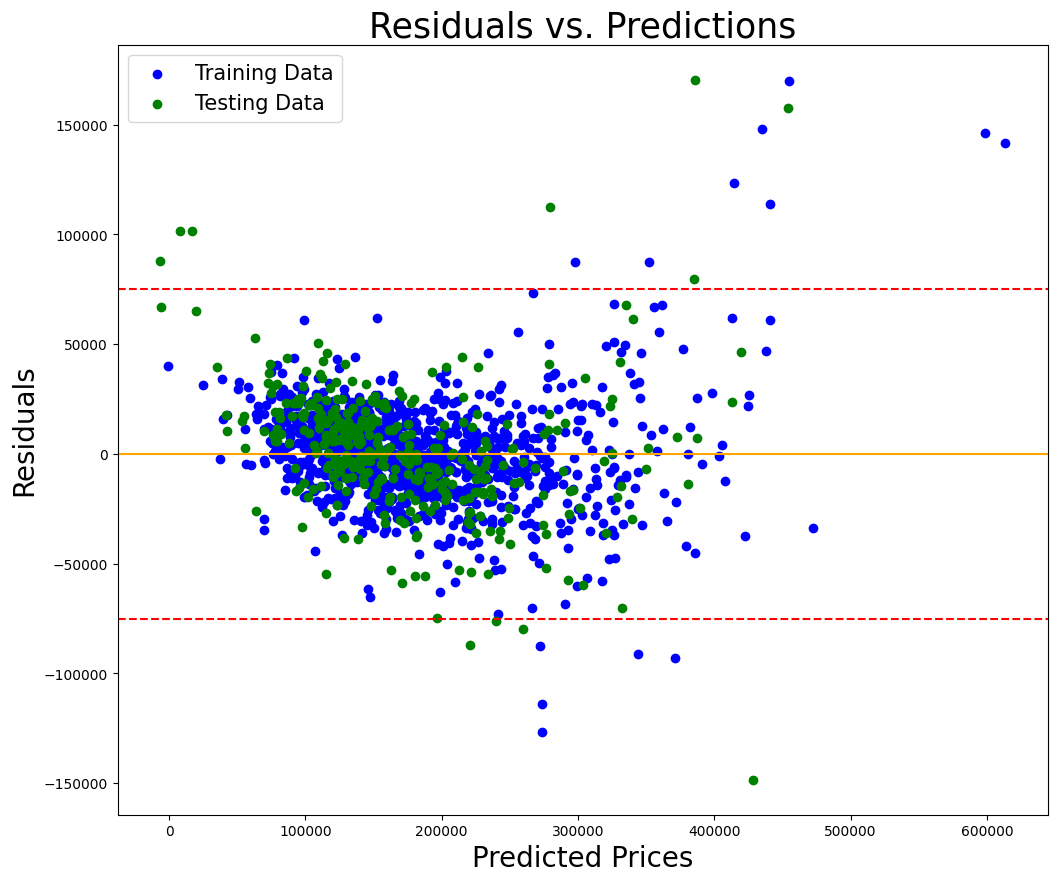

In [213]:
resids_preds_scatter(train_pred, train_resids, test_pred, test_resids, 75000)

## Log Transformation

Attempt to improve the model by prediciting log(prices)

..............